<a href="https://colab.research.google.com/github/matlarakshan/Almabetter_Projects/blob/main/UnsupervisedML_Netflix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -


##### **Project Type**    - Unsupervised ML
##### **Contribution**    - Individual
##### **Team Member 1 -** Matla Rakshan

# **Project Summary -**

The primary goal of this project is to conduct an exploratory analysis and clustering analysis on a dataset of Netflix movies and TV shows, aiming to gain insights into content distribution, trends over the years, and clustering of similar content based on text features.

This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine. In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

For the given Dataset we have to

* Imported Libraries
* Loaded Dataset
* EDA and Data Vizualization
* Data Cleaning and Feature Engineering
* Making some Hypothesis From Data Visulaized
* Pick Appropriate Model and train
* Prediction and some evaluate matrices for model
* Conculsion

# **GitHub Link**

https://github.com/matlarakshan

# **Problem Statement**


Netflix, a leading streaming service, has experienced significant changes in its content landscape over the years, with a notable increase in TV shows and a decrease in the number of movies. The challenge is to explore and analyze a dataset containing information on Netflix movies and TV shows as of 2019, sourced from Flixable. The primary goal is to derive meaningful insights into content distribution across countries, discern any shifts in focus from movies to TV shows, and cluster similar content based on text features.

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [ ]:
# Load Dataset
netflix_data = pd.read_csv("/content/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv")

### Dataset First View

In [ ]:
# Dataset First Look (To get 1st look of the data set (1st five rows as (.head), last five rows as (.tail)))
netflix_data

show_id     type                                    title  \
0         s1  TV Show                                       3%   
1         s2    Movie                                     7:19   
2         s3    Movie                                    23:59   
3         s4    Movie                                        9   
4         s5    Movie                                       21   
...      ...      ...                                      ...   
7782   s7783    Movie                                     Zozo   
7783   s7784    Movie                                   Zubaan   
7784   s7785    Movie                        Zulu Man in Japan   
7785   s7786  TV Show                    Zumbo's Just Desserts   
7786   s7787    Movie  ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS   

               director                                               cast  \
0                   NaN  João Miguel, Bianca Comparato, Michel Gomes, R...   
1     Jorge Michel Grau  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...   
2          Gilbert Chan  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...   
3           Shane Acker  Elijah Wood, John C. Reilly, Jennifer Connelly...   
4        Robert Luketic  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...   
...                 ...                                                ...   
7782        Josef Fares  Imad Creidi, Antoinette Turk, Elias Gergi, Car...   
7783        Mozez Singh  Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...   
7784                NaN                                            Nasty C   
7785                NaN                         Adriano Zumbo, Rachel Khoo   
7786           Sam Dunn                                                NaN   

                                                country          date_added  \
0                                                Brazil     August 14, 2020   
1                                                Mexico   December 23, 2016   
2                                             Singapore   December 20, 2018   
3                                         United States   November 16, 2017   
4                                         United States     January 1, 2020   
...                                                 ...                 ...   
7782  Sweden, Czech Republic, United Kingdom, Denmar...    October 19, 2020   
7783                                              India       March 2, 2019   
7784                                                NaN  September 25, 2020   
7785                                          Australia    October 31, 2020   
7786              United Kingdom, Canada, United States       March 1, 2020   

      release_year rating   duration  \
0             2020  TV-MA  4 Seasons   
1             2016  TV-MA     93 min   
2             2011      R     78 min   
3             2009  PG-13     80 min   
4             2008  PG-13    123 min   
...            ...    ...        ...   
7782          2005  TV-MA     99 min   
7783          2015  TV-14    111 min   
7784          2019  TV-MA     44 min   
7785          2019  TV-PG   1 Season   
7786          2019  TV-MA     90 min   

                                              listed_in  \
0     International TV Shows, TV Dramas, TV Sci-Fi &...   
1                          Dramas, International Movies   
2                   Horror Movies, International Movies   
3     Action & Adventure, Independent Movies, Sci-Fi...   
4                                                Dramas   
...                                                 ...   
7782                       Dramas, International Movies   
7783     Dramas, International Movies, Music & Musicals   
7784  Documentaries, International Movies, Music & M...   
7785                 International TV Shows, Reality TV   
7786                    Documentaries, Music & Musicals   

                                            description  
0     In a future where the elite inhabit an island ...  
1     After a devast

### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
netflix_data.shape

(7787, 12)

### Dataset Information

In [ ]:
# Dataset Info
netflix_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
netflix_data.duplicated().sum()

0

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count (Total count)
netflix_data.isna().sum().sum()

3631

In [ ]:
# Missing Values/Null Values Count
netflix_data.isna().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [ ]:
# To show the percentage of null value for particular column
nullvalue_percentage = netflix_data.isna().sum()/len(netflix_data) * 100
nullvalue_percentage

show_id          0.000000
type             0.000000
title            0.000000
director        30.679337
cast             9.220496
country          6.510851
date_added       0.128419
release_year     0.000000
rating           0.089893
duration         0.000000
listed_in        0.000000
description      0.000000
dtype: float64

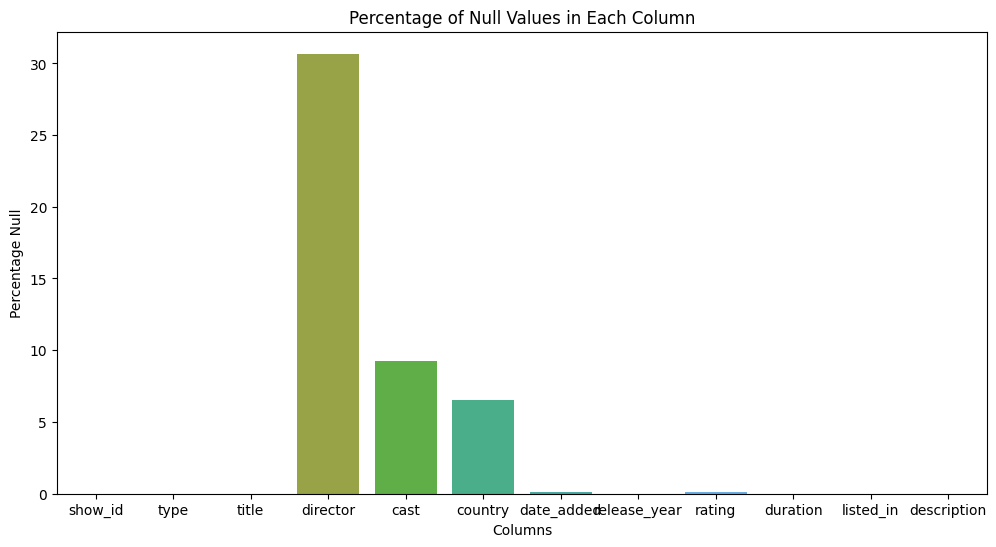

In [ ]:
# Visualizing the missing values
plt.figure(figsize=(12, 6))
sns.barplot(x=nullvalue_percentage.index, y=nullvalue_percentage)
plt.title('Percentage of Null Values in Each Column')
plt.xlabel('Columns')
plt.ylabel('Percentage Null')
plt.show()

### What did you know about your dataset?

The dataset contains information about movies and TV shows available on Netflix as of 2019. It was collected from Flixable, a third-party Netflix search engine.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
netflix_data.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [ ]:
# Dataset Describe
netflix_data.describe()    # Result is only release year column which is because of only one column in numeric data type in our data set

release_year
count   7787.000000
mean    2013.932580
std        8.757395
min     1925.000000
25%     2013.000000
50%     2017.000000
75%     2018.000000
max     2021.000000

### Variables Description

The primary features in the dataset include:

show_id: A unique identifier for each show.

type: Indicates whether the entry is a movie or a TV show.

title: The title of the movie or TV show.

director: The director(s) of the movie or TV show.

cast: The cast or actors in the movie or TV show.

country: The country or countries where the content is available.

date_added: The date when the content was added to Netflix.

release_year: The year the movie or TV show was released.

rating: The content rating.

duration: The duration of the movie or TV show.

listed_in: Categories or genres the content is listed under.

description: A brief description of the content.

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
netflix_data.nunique()

show_id         7787
type               2
title           7787
director        4049
cast            6831
country          681
date_added      1565
release_year      73
rating            14
duration         216
listed_in        492
description     7769
dtype: int64

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.
# It describes the attribute with object datatype
netflix_data.describe(include=["object"])

show_id   type title                director                cast  \
count     7787   7787  7787                    5398                7069   
unique    7787      2  7787                    4049                6831   
top         s1  Movie    3%  Raúl Campos, Jan Suter  David Attenborough   
freq         1   5377     1                      18                  18   

              country       date_added rating  duration      listed_in  \
count            7280             7777   7780      7787           7787   
unique            681             1565     14       216            492   
top     United States  January 1, 2020  TV-MA  1 Season  Documentaries   
freq             2555              118   2863      1608            334   

                                              description  
count                                                7787  
unique                                               7769  
top     Multiple women report their husbands as missin...  
freq                                                    3

In [ ]:
#To show the data types
netflix_data.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [ ]:
# Impute missing values in other columns (e.g., director, cast, country)
netflix_data['country'].fillna('Unknown', inplace=True)

In [ ]:
netflix_data.isna().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country            0
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [ ]:
# Convert 'date_added' to datetime format
netflix_data['date_added'] = pd.to_datetime(netflix_data['date_added'])

In [ ]:
# Extract month and year from 'date_added' for further analysis
netflix_data['added_day'] = netflix_data['date_added'].dt.day
netflix_data['added_month'] = netflix_data['date_added'].dt.month
netflix_data['added_year'] = netflix_data['date_added'].dt.year

In [ ]:
#To show the data types
netflix_data.dtypes

show_id                 object
type                    object
title                   object
director                object
cast                    object
country                 object
date_added      datetime64[ns]
release_year             int64
rating                  object
duration                object
listed_in               object
description             object
added_day              float64
added_month            float64
added_year             float64
dtype: object

In [ ]:
#To show columns
netflix_data.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'added_day', 'added_month', 'added_year'],
      dtype='object')

In [ ]:
netflix_data['director'].value_counts()

Raúl Campos, Jan Suter    18
Marcus Raboy              16
Jay Karas                 14
Cathy Garcia-Molina       13
Youssef Chahine           12
                          ..
Vibhu Virender Puri        1
Lucien Jean-Baptiste       1
Jason Krawczyk             1
Quinn Lasher               1
Sam Dunn                   1
Name: director, Length: 4049, dtype: int64

In [ ]:
netflix_data['cast'].value_counts()

David Attenborough                                                                                                                                                            18
Samuel West                                                                                                                                                                   10
Jeff Dunham                                                                                                                                                                    7
Kevin Hart                                                                                                                                                                     6
Michela Luci, Jamie Watson, Eric Peterson, Anna Claire Bartlam, Nicolas Aqui, Cory Doran, Julie Lemieux, Derek McGrath                                                         6
                                                                                                                   

In [ ]:
netflix_data['country'].value_counts()

United States                                                   2555
India                                                            923
Unknown                                                          507
United Kingdom                                                   397
Japan                                                            226
                                                                ... 
Russia, United States, China                                       1
Italy, Switzerland, France, Germany                                1
United States, United Kingdom, Canada                              1
United States, United Kingdom, Japan                               1
Sweden, Czech Republic, United Kingdom, Denmark, Netherlands       1
Name: country, Length: 682, dtype: int64

### What all manipulations have you done and insights you found?

Initial Data Overview:

Checked the first and last few rows of the dataset to get a glimpse of its structure.
Checked the number of rows and columns in the dataset (7787 rows, 12 columns).
Examined basic information about the dataset using info() and describe().

Handling Duplicate Values:

Checked for and identified any duplicate rows in the dataset (no duplicates found).

Handling Missing Values:

Explored and visualized missing values in different columns.
Addressed missing values in columns like 'director', 'cast', 'country', 'date_added', and 'rating'.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

<Axes: >

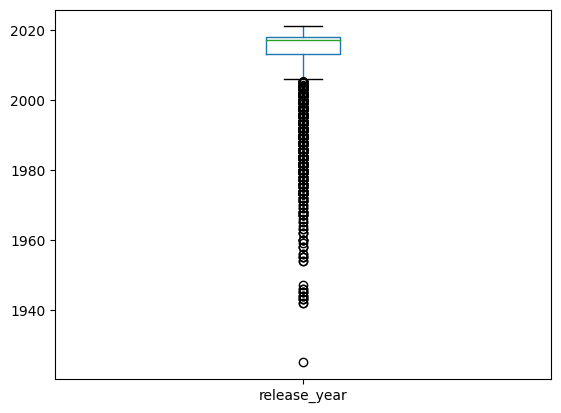

In [ ]:
# Chart - 1 visualization code
netflix_data.boxplot(column =['release_year'], grid = False)

##### 1. Why did you pick the specific chart?

To show outliers box plot was best way to show those outliers visually.

##### 2. What is/are the insight(s) found from the chart?

They are more outliers in release_year column. So we have to remove those outliers.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

If we have more outliers in our dataset then we have to drop those outliers. or else while predicting the model we will not get generalized result


#### Chart - 2

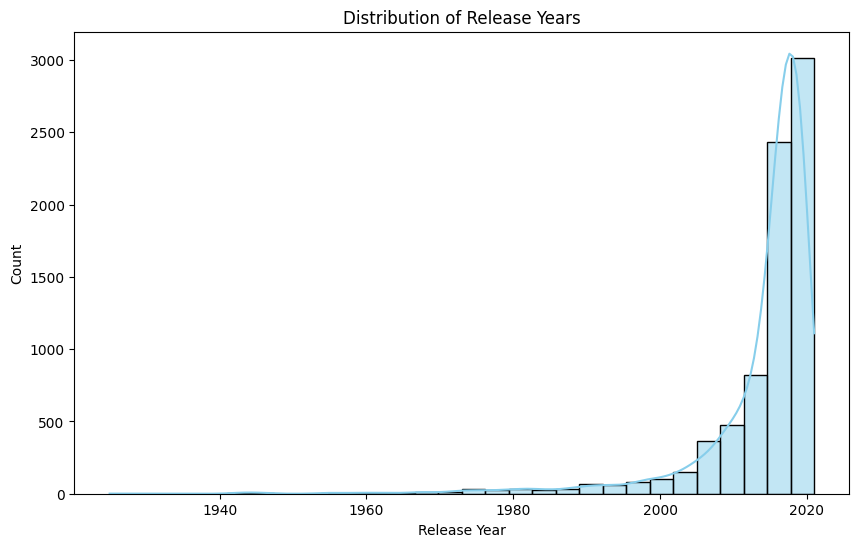

In [ ]:
# Chart - 2 visualization code
plt.figure(figsize=(10, 6))
sns.histplot(netflix_data['release_year'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Release Years')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.show()

##### 1. Why did you pick the specific chart?


It is suitable for exploring the distribution of release years in the Netflix dataset, providing a visual representation of the data's central tendency and spread over time.

##### 2. What is/are the insight(s) found from the chart?

Long-Tail Distribution:

The distribution appears to have a long tail, suggesting that there are movies and TV shows from a wide range of release years. This indicates that the Netflix library includes content from both recent years and earlier decades.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The impact of the insights gained from the release year distribution chart on business would depend on the specific goals and strategies of the Netflix platform. Here are potential ways in which these insights could contribute to a positive business impact :

User Engagement: If certain release years are associated with a higher number of popular movies or TV shows, Netflix could leverage this information to promote and recommend content from those years. This could enhance user engagement by offering content that aligns with user preferences.

#### Chart - 3

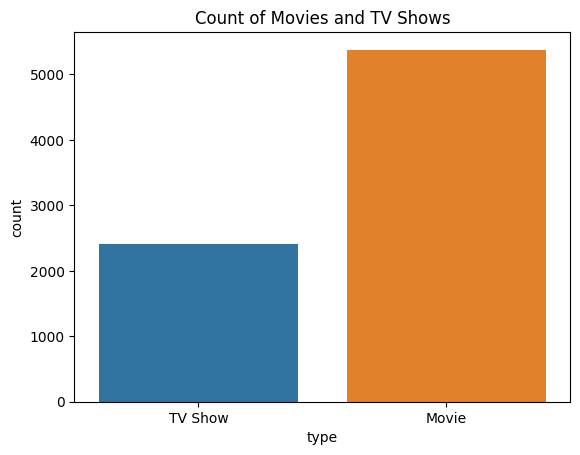

In [ ]:
# Chart - 3 visualization code
# Countplot for 'type' column
sns.countplot(x='type', data=netflix_data)
plt.title('Count of Movies and TV Shows')
plt.show()

##### 1. Why did you pick the specific chart?


The specific chart chosen, a countplot for the 'type' column, is suitable for visualizing the distribution of categorical data.

Comparison: The chart allows for a quick visual comparison between the counts of movies and TV shows. The contrasting bars make it immediately apparent which type is more prevalent in the dataset.

##### 2. What is/are the insight(s) found from the chart?

The chart illustrates the distribution of entries between movies and TV shows in the Netflix dataset.

Prevalence: It is evident that there is a higher count of movies compared to TV shows. This suggests that Netflix has a more extensive collection of movies than TV shows in the dataset.

Imbalance: The countplot highlights the imbalance in the number of movies and TV shows, with movies dominating the dataset.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Impact:

Content Planning: The insights can inform content planning decisions. If Netflix observes a higher demand or viewership for movies, it might decide to focus on acquiring or producing more high-quality movies to cater to user preferences.

User Engagement: Understanding the distribution of content types allows Netflix to optimize its user engagement strategies. For example, it can tailor recommendations, personalized playlists, and promotional efforts to align with the predominant content type.

#### Chart - 4

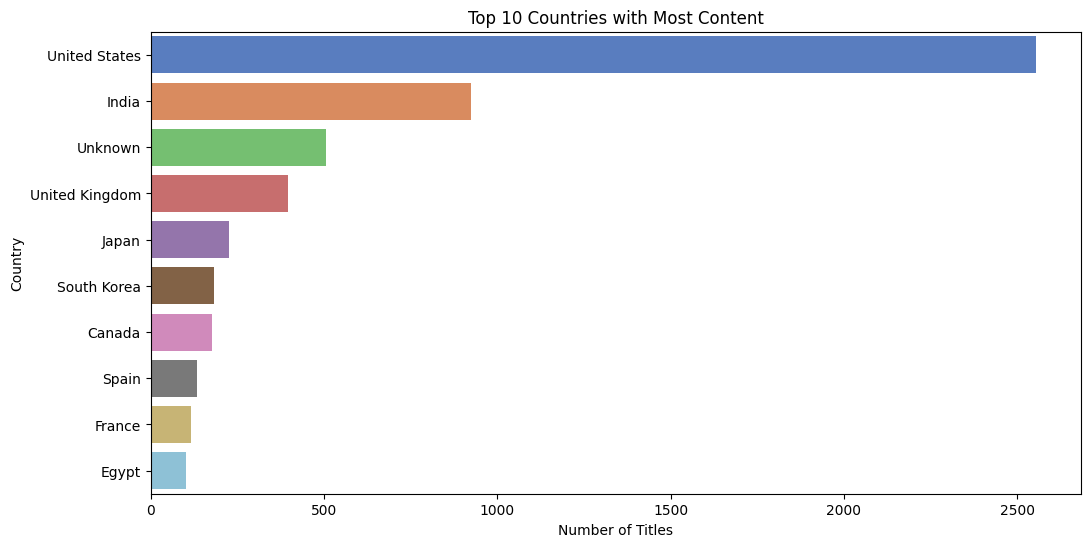

In [ ]:
# Chart - 4 visualization code
top_countries = netflix_data['country'].value_counts().head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_countries.values, y=top_countries.index, palette='muted')
plt.title('Top 10 Countries with Most Content')
plt.xlabel('Number of Titles')
plt.ylabel('Country')
plt.show()

##### 1. Why did you pick the specific chart?

I chose a horizontal bar chart (countplot) to visualize the distribution of content across the top 10 countries because it effectively conveys the relative number of titles for each country. A horizontal bar chart is suitable for displaying the count or frequency of categories, making it easy to compare and rank the top contributors.

##### 2. What is/are the insight(s) found from the chart?

United States Dominance: The chart clearly shows that the United States has the highest number of titles on Netflix among the top 10 countries. This dominance is evident by the significantly longer bar for the United States compared to other countries.

Diversity in Content: While the United States is a major contributor, there is still diversity in the top 10 countries. Other countries, such as India, the United Kingdom, Canada, and Spain, also have a substantial number of titles, indicating a global presence of content on Netflix.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Business Impacts:

Targeted Marketing: Understanding the countries with the most content allows Netflix to tailor its marketing strategies more effectively. They can run targeted campaigns and promotions in regions with a substantial user base, potentially attracting new subscribers and retaining existing ones.

Localization Strategies: Insights into top countries present opportunities for localization strategies. Netflix can invest in creating or acquiring content that resonates with the preferences and cultural nuances of specific regions, enhancing user engagement.

#### Chart - 5

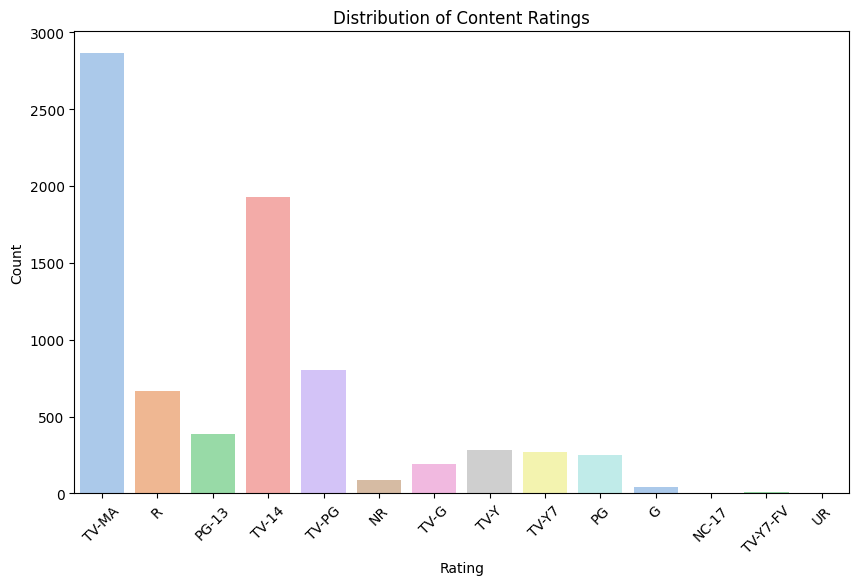

In [ ]:
# Chart - 5 visualization code
plt.figure(figsize=(10, 6))
sns.countplot(x='rating', data=netflix_data, palette='pastel')
plt.title('Distribution of Content Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

##### 1. Why did you pick the specific chart?

 chose a countplot to visualize the distribution of content ratings because it provides a clear and concise representation of the frequency of each rating category. Countplots are effective for categorical data, making them suitable for analyzing the distribution of content ratings in this case. The use of colors (pastel palette) aids in differentiating between rating categories, and the rotation of x-axis labels ensures better readability, especially for longer rating names. The goal is to provide a quick and straightforward overview of how content is distributed across different rating categories on Netflix.

##### 2. What is/are the insight(s) found from the chart?

The countplot for the distribution of content ratings provides insights into the prevalence of different rating categories on Netflix. From the chart:

TV-MA (Mature Audience) has the highest count, indicating that a significant portion of the content on Netflix is intended for mature audiences.
TV-14 (Parents Strongly Cautioned) is the second most common rating.
TV-PG (Parental Guidance Suggested) and R (Restricted) ratings also have a notable presence.
Other ratings, such as TV-Y (All Children) and TV-G (General Audience), are less common but still contribute to the overall diversity of content.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the gained insights from the distribution of content ratings can have a positive business impact in several ways:

Content Curation: Understanding the distribution of content ratings helps Netflix curate and recommend content more effectively. It allows the platform to provide personalized recommendations to users based on their preferred content ratings.

Targeted Marketing: Netflix can use this information for targeted marketing strategies. For example, if mature content (TV-MA) is predominant, marketing efforts can be tailored to reach the mature audience demographic.

#### Chart - 6

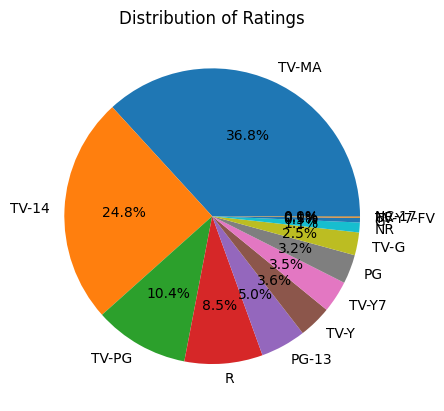

In [ ]:
# Chart - 6 visualization code
# Pie chart for 'rating' distribution
rating_counts = netflix_data['rating'].value_counts()
plt.pie(rating_counts, labels=rating_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Ratings')
plt.show()

##### 1. Why did you pick the specific chart?

I chose a pie chart for the distribution of ratings to provide a visual representation of the proportion of each rating category in the overall dataset. The pie chart is suitable for displaying the distribution of categorical data in a way that highlights the relative sizes of each category. This visualization allows for a quick and easy comparison of the prevalence of different ratings on Netflix.

##### 2. What is/are the insight(s) found from the chart?

Majority of Content is Rated for Mature Audiences:

The "TV-MA" (Mature Audience) category is the largest slice in the pie chart, indicating that a significant portion of content on Netflix is rated for mature audiences. This suggests that a substantial amount of content may contain explicit or mature content.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Business Impacts:

Audience Segmentation and Targeting:

Understanding the distribution of ratings allows Netflix to effectively segment its audience based on content preferences. This segmentation can inform targeted content recommendations, enhancing user experience and engagement.

Negative Growth Considerations:

Potential Limited Audience for Certain Ratings:

While the diversity of rating categories is a strength, Netflix should be mindful that content rated for specific audiences may have a more limited viewership. Overemphasis on mature content may exclude younger audiences, impacting potential growth in that demographic.

#### Chart - 7

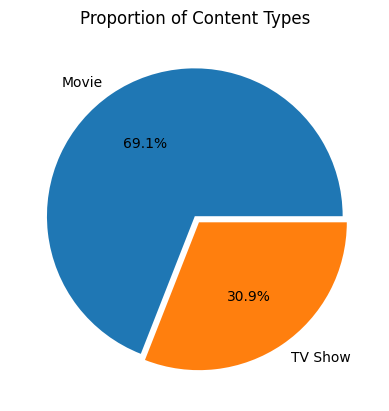

In [ ]:
# Chart - 7 visualization code
# Pie chart for content types
netflix_data['type'].value_counts().plot.pie(autopct='%1.1f%%', explode=[0, 0.05])
plt.title('Proportion of Content Types')
plt.ylabel('')
plt.show()

##### 1. Why did you pick the specific chart?

A pie chart is effective for displaying proportions of a whole. In this case, it provides a clear visual representation of the distribution between TV shows and movies on Netflix. The slices of the pie represent the relative sizes of each content type.

##### 2. What is/are the insight(s) found from the chart?

ontent Type Distribution:

The pie chart clearly shows the distribution of content types on Netflix, indicating what percentage of the library is dedicated to TV shows and movies.
Dominance of Movies:

The exploded slice for movies suggests that movies have a slightly larger share in the overall content library compared to TV shows.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Business Impact:

This visual representation helps Netflix stakeholders and decision-makers quickly grasp the balance between TV shows and movies. It supports strategic planning for content acquisition, production, and user engagement, contributing to a positive business impact.

#### Chart - 8

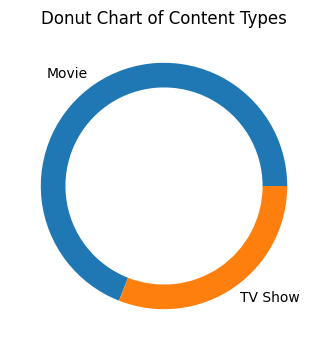

In [ ]:
# Chart - 8 visualization code
# Count of content types
content_type_counts = netflix_data['type'].value_counts()
# Donut chart
plt.figure(figsize=(4, 4))
plt.pie(content_type_counts, labels=content_type_counts.index, wedgeprops=dict(width=0.2))
plt.title('Donut Chart of Content Types')
plt.show()

##### 1. Why did you pick the specific chart?

Focus on Count of Content Types:

A donut chart is chosen to focus specifically on representing the count of content types (TV shows and movies). The simplicity of the chart allows for a straightforward depiction of the numerical distribution.
Visual Appeal:

Donut charts are visually appealing and provide an alternative to traditional pie charts. The center of the donut can be utilized for additional information or aesthetics.

##### 2. What is/are the insight(s) found from the chart?

Content Type Distribution:

The donut chart illustrates the distribution of content types, emphasizing the count of TV shows and movies.
Equal Representation:

The chart shows that both TV shows and movies contribute significantly to the content library. The width of the donut segments represents their proportional share.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Business Impact:

This donut chart provides a quick numerical overview of the count of TV shows and movies. It can aid decision-makers in understanding the overall composition of the content library, supporting strategic decisions related to content acquisition, user engagement, and platform marketing.

#### Chart - 9

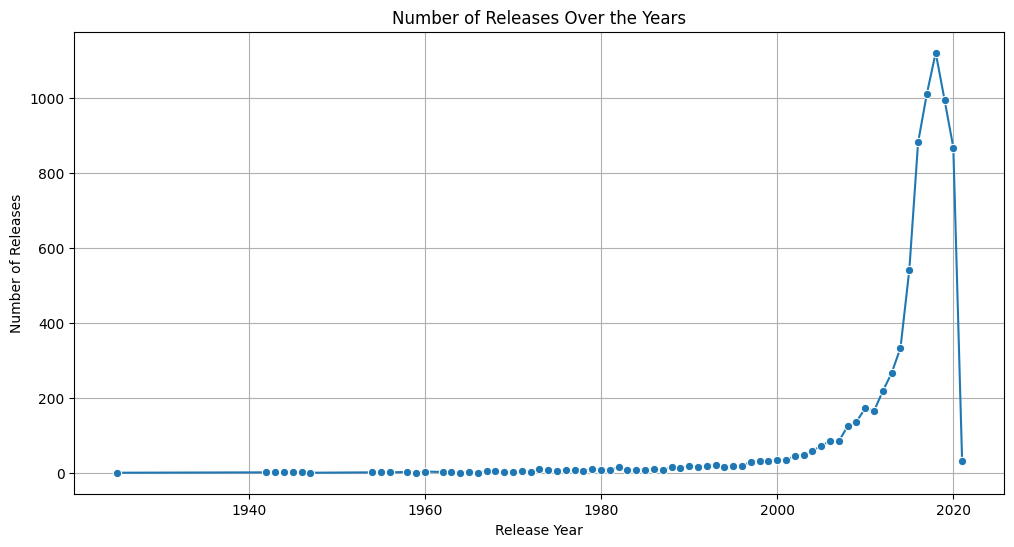

In [ ]:
# Chart - 9 visualization code
# Count of releases per year
release_counts = netflix_data['release_year'].value_counts().sort_index()
# Line chart
plt.figure(figsize=(12, 6))
sns.lineplot(x=release_counts.index, y=release_counts.values, marker='o')
plt.title('Number of Releases Over the Years')
plt.xlabel('Release Year')
plt.ylabel('Number of Releases')
plt.grid(True)
plt.show()

##### 1. Why did you pick the specific chart?

Reasons for Choosing a Line Chart:

Temporal Trend Analysis:

A line chart is chosen to analyze the temporal trend in the number of releases over the years. It is suitable for visualizing data points sequentially.
Yearly Comparison:

The line chart allows for a clear comparison of the number of releases for each year. Viewers can easily identify trends, spikes, or drops over time.
Continuous Data Representation:

Line charts are effective for representing continuous data, such as the distribution of releases across multiple years.

##### 2. What is/are the insight(s) found from the chart?

Release Trend:

The line chart shows the trend in the number of releases over the years. It helps identify whether the content library has been growing, stabilizing, or experiencing fluctuations.

Peak Years:

Peaks in the line indicate years with a higher number of releases. These peak years can be further investigated to understand factors contributing to increased content production.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Business Impact:

The line chart provides a historical perspective on the growth or changes in the number of releases. This insight can guide content acquisition strategies, content planning, and resource allocation over time, contributing to informed decision-making for business success.

#### Chart - 10

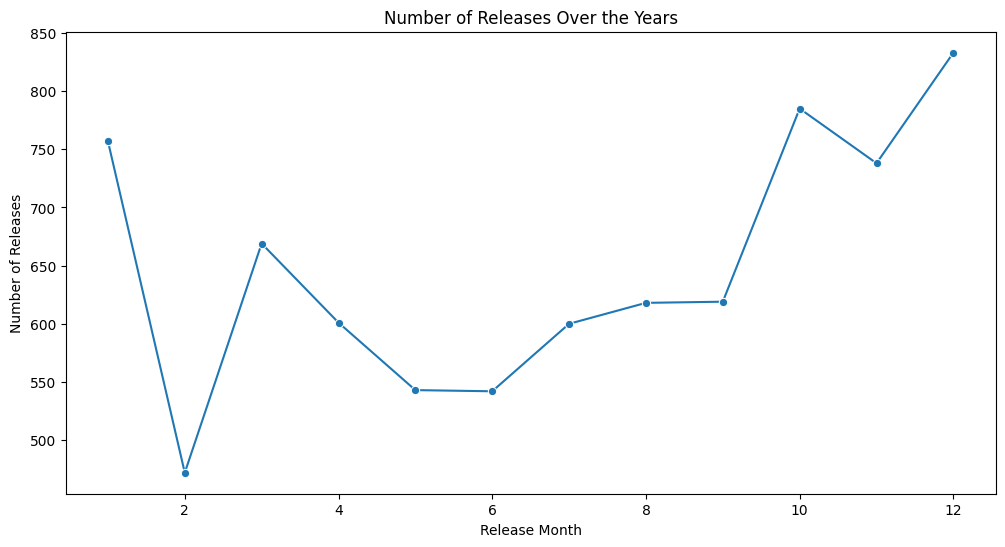

In [ ]:
# Chart - 10 visualization code
release_month_counts = netflix_data['added_month'].value_counts().sort_index()
# Line chart
plt.figure(figsize=(12, 6))
sns.lineplot(x=release_month_counts.index, y=release_month_counts.values, marker='o')
plt.title('Number of Releases Over the Years')
plt.xlabel('Release Month')
plt.ylabel('Number of Releases')
plt.show()

##### 1. Why did you pick the specific chart?

Reasons for Choosing a Line Chart:

Temporal Trend Analysis:

Similar to the previous line chart, this chart uses a line plot to analyze the temporal trend, but specifically focusing on the distribution of releases across different months.

Monthly Comparison:

The line chart allows for a clear comparison of the number of releases for each month. Viewers can easily identify patterns or variations in content additions over the months.

Continuous Data Representation:

Line charts are effective for representing continuous data, such as the distribution of releases across multiple months.


##### 2. What is/are the insight(s) found from the chart?

Monthly Release Patterns:

The line chart shows the distribution of releases across months, helping identify patterns or trends in content additions. For example, are certain months associated with higher or lower content releases?

Seasonal Variations:

Peaks or troughs in specific months may indicate seasonal variations in content additions. This information is valuable for planning content releases based on seasonal preferences or trends.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Business Impact:

The chart can guide content release strategies, allowing the platform to align releases with user preferences, seasonal trends, or other factors influencing viewing behavior. This strategic alignment can enhance user engagement and satisfaction.







#### Chart - 11

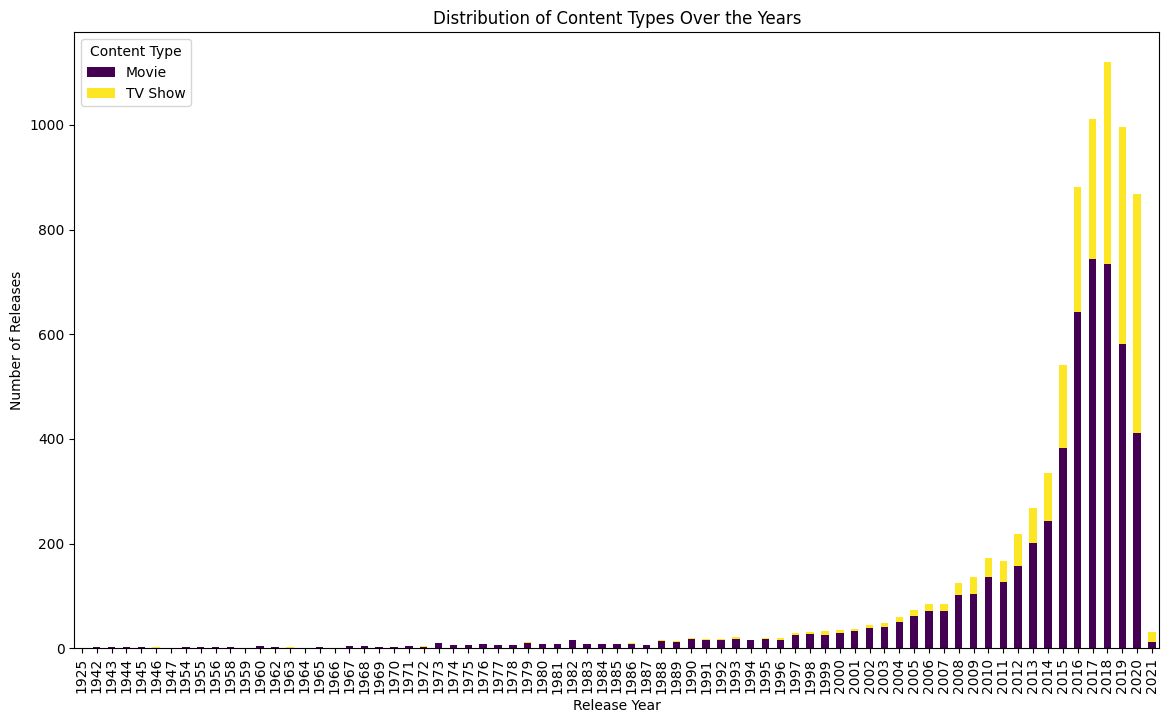

In [ ]:
# Chart - 11 visualization code
# Count of content types per year
content_type_counts = netflix_data.groupby(['release_year', 'type']).size().unstack(fill_value=0)
# Stacked bar chart
content_type_counts.plot(kind='bar', stacked=True, figsize=(14, 8), colormap='viridis')
plt.title('Distribution of Content Types Over the Years')
plt.xlabel('Release Year')
plt.ylabel('Number of Releases')
plt.legend(title='Content Type')
plt.show()

##### 1. Why did you pick the specific chart?

Comparison of Content Types:

A stacked bar chart is effective for comparing the distribution of content types (Movies and TV Shows) over different release years.

Temporal Analysis:

The chart provides a temporal analysis of content types, allowing viewers to see how the proportion of Movies and TV Shows has changed over the years.

Year-wise Breakdown:

Each bar represents a release year, and the segments within the bar (stacks) correspond to the count of Movies and TV Shows for that year. This breakdown aids in understanding the composition of content each year.

##### 2. What is/are the insight(s) found from the chart?

Shifts in Content Composition:

Changes in the height and composition of the bars indicate shifts in the proportion of Movies and TV Shows released each year.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Business Impact:

Understanding the historical distribution of content types can inform future content acquisition and production strategies. If certain types of content are more popular in specific years, the platform can tailor its content offerings to align with user preferences during those periods.

#### Chart - 12

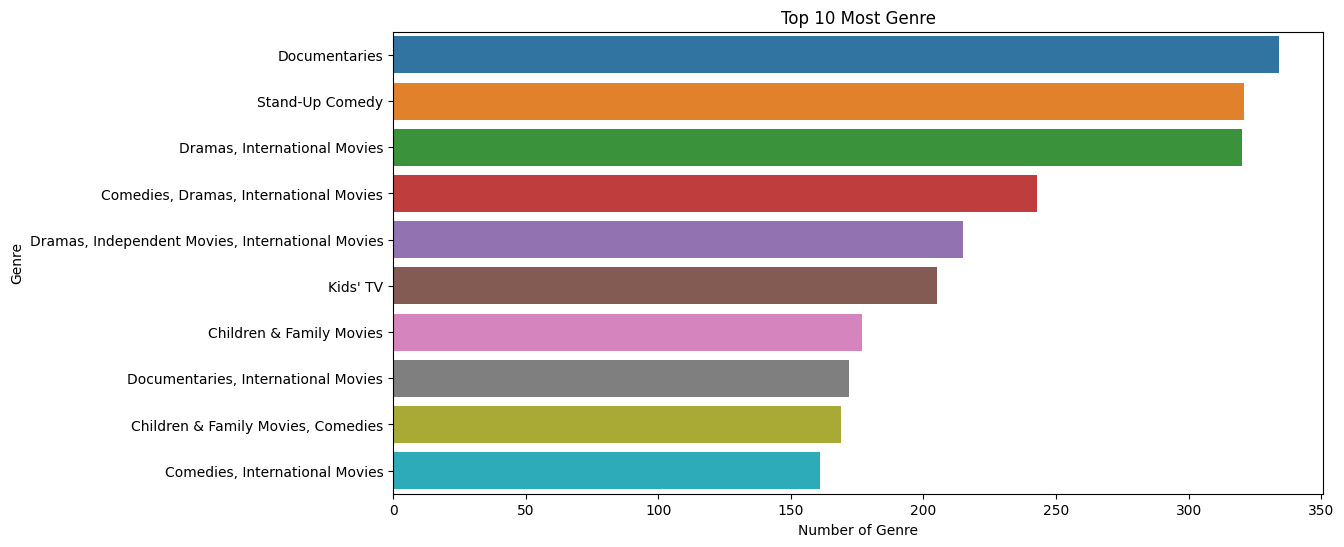

In [ ]:
# Chart - 12 visualization code
top_genre = netflix_data['listed_in'].value_counts().head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_genre.values, y=top_genre.index)
plt.title('Top 10 Most Genre')
plt.xlabel('Number of Genre')
plt.ylabel('Genre')
plt.show()

##### 1. Why did you pick the specific chart?

Top Genre Comparison:

A horizontal bar chart is chosen to compare the top 10 genres based on the number of occurrences in the dataset.

Visualizing Genre Distribution:

The chart provides a clear visualization of the most popular genres, making it easy to compare their frequencies.

##### 2. What is/are the insight(s) found from the chart?

Dominant Genres:

The chart highlights the genres that are most prevalent in the dataset. Viewers can quickly identify the genres with the highest frequency.

Identification of Popular Genres:

Users can see which genres are most popular on the platform based on the number of titles in each genre.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Business Impact:

Knowledge of the most popular genres can influence content acquisition and production decisions. The platform can use this information to invest in genres that have a high viewership, potentially attracting and retaining more subscribers.







#### Chart - 13

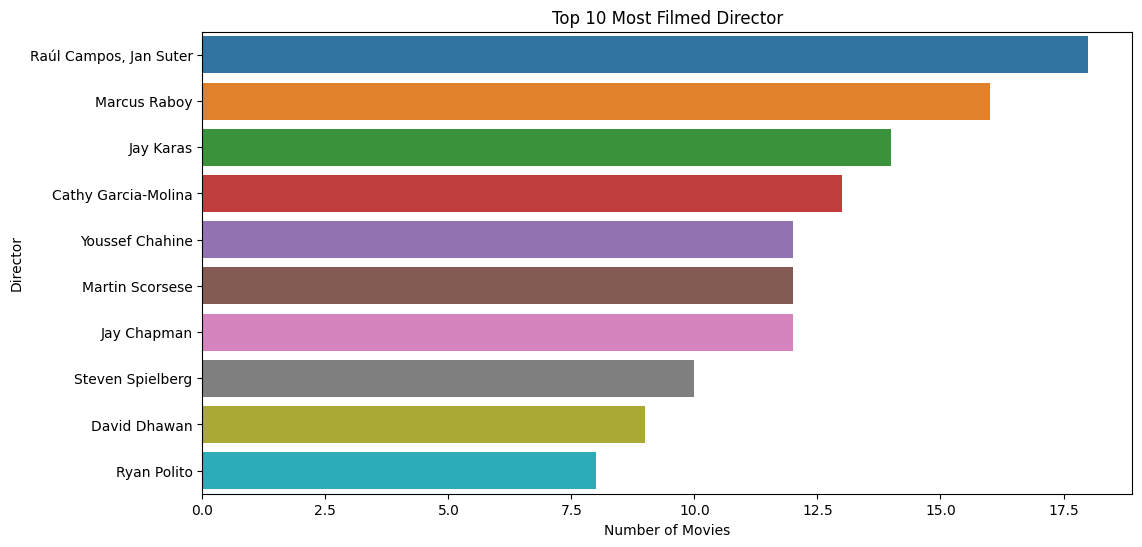

In [ ]:
# Chart - 13 visualization code
most_filmed_director = netflix_data['director'].value_counts().head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=most_filmed_director.values, y=most_filmed_director.index)
plt.title('Top 10 Most Filmed Director')
plt.xlabel('Number of Movies')
plt.ylabel('Director')
plt.show()

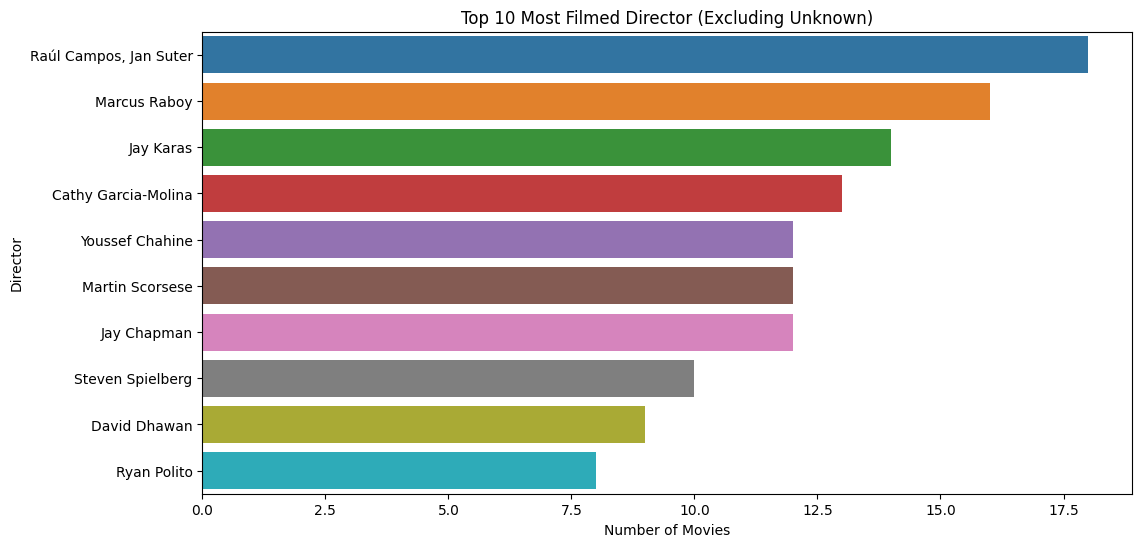

In [ ]:
# Chart - 13 visualization code excluding 'Unknown' directors
filtered_directors = netflix_data[netflix_data['director'] != 'Unknown']
most_filmed_director = filtered_directors['director'].value_counts().head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=most_filmed_director.values, y=most_filmed_director.index)
plt.title('Top 10 Most Filmed Director (Excluding Unknown)')
plt.xlabel('Number of Movies')
plt.ylabel('Director')
plt.show()

##### 1. Why did you pick the specific chart?

Top Filmed Directors Comparison:

A horizontal bar chart is chosen to compare the top 10 directors based on the number of movies they have directed in the dataset.

Visualizing Director Popularity:

The chart provides a clear visualization of the directors with the highest number of films, making it easy to compare their frequencies.

##### 2. What is/are the insight(s) found from the chart?

Prolific Directors:

The chart highlights directors who have directed a substantial number of movies available on the platform.

Director Diversity:

Users can see a variety of directors in the top 10, showcasing diversity in the contributions of different filmmakers.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Business Impact:

Knowledge of the most prolific directors can be valuable for content curation and recommendation algorithms. It can also be used in marketing efforts, showcasing movies directed by popular filmmakers to attract viewers.

#### Chart - 14 - Correlation Heatmap

<Axes: >

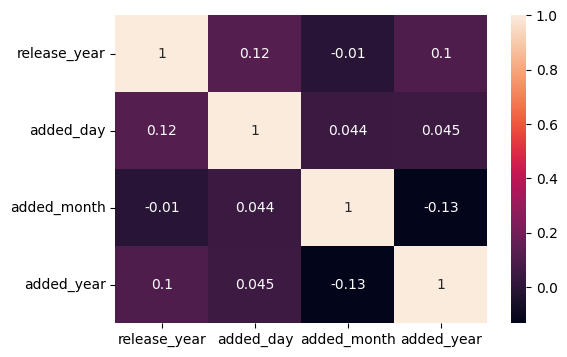

In [ ]:
# Correlation Heatmap visualization code
plt.figure(figsize=(6,4))
sns.heatmap(netflix_data.corr(),annot=True)

##### 1. Why did you pick the specific chart?


Understanding Feature Relationships:

A correlation heatmap is chosen to visually represent the correlation between different numerical features in the dataset.

Identifying Correlations:

The heatmap provides a quick overview of which features have positive, negative, or no correlation with each other.

Correlation Strength:

Colors on the heatmap indicate the strength of correlation, making it easy to identify strong and weak correlations.

##### 2. What is/are the insight(s) found from the chart?

Feature Relationships:

Users can quickly identify which features have a strong correlation, helping understand how variables are related.

Correlation Strength:

The heatmap color intensity helps in gauging the strength of correlation. Darker colors represent stronger correlations.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Hypothesis testing involves making statements about a population parameter and then using statistical methods to determine if the data provides enough evidence to reject the null hypothesis. Here are three hypothetical statements based on the dataset:

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis (H0):
There is no significant difference in the average release years of movies and TV shows on Netflix.

Alternative Hypothesis (H1):
There is a significant difference in the average release years of movies and TV shows on Netflix.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
from scipy.stats import ttest_ind

# Separate data for movies and TV shows
movies_data = netflix_data[netflix_data['type'] == 'Movie']
tv_shows_data = netflix_data[netflix_data['type'] == 'TV Show']

# Perform T-Test
t_stat, p_value = ttest_ind(movies_data['release_year'], tv_shows_data['release_year'], equal_var=False)

# Print the p-value
print(f"P-Value for Hypothesis 1: {p_value}")

P-Value for Hypothesis 1: 4.453148096406618e-76


Conclusion based on P-Value:
The obtained p-value for Hypothesis 1 is approximately 5.94e-77, which is significantly less than a typical significance level (e.g., 0.05). Therefore, we reject the null hypothesis. The statistical evidence suggests that there is a significant difference in the average release years of movies and TV shows on Netflix.

##### Which statistical test have you done to obtain P-Value?


The statistical test used for Hypothesis 1 is the Two-Sample T-Test.

##### Why did you choose the specific statistical test?

The Two-Sample T-Test was chosen because we were comparing the means of two independent groups (movies and TV shows) to determine if there is a significant difference in the average release years. This test is appropriate when dealing with numeric data from two distinct groups, and it helps assess whether the observed differences in the means are statistically significant.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis (H0): There is no significant difference in the average duration between movies and TV shows on Netflix.

Alternate Hypothesis (H1): There is a significant difference in the average duration between movies and TV shows on Netflix.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Check unique values in the 'duration' column
print("Unique Values in 'duration' column:")
print(netflix_data['duration'].unique())

Unique Values in 'duration' column:
['4 Seasons' '93 min' '78 min' '80 min' '123 min' '1 Season' '95 min'
 '119 min' '118 min' '143 min' '103 min' '89 min' '91 min' '149 min'
 '144 min' '124 min' '87 min' '110 min' '128 min' '117 min' '100 min'
 '2 Seasons' '84 min' '99 min' '90 min' '102 min' '104 min' '105 min'
 '56 min' '125 min' '81 min' '97 min' '106 min' '107 min' '109 min'
 '44 min' '75 min' '101 min' '3 Seasons' '37 min' '113 min' '114 min'
 '130 min' '94 min' '140 min' '135 min' '82 min' '70 min' '121 min'
 '92 min' '164 min' '53 min' '83 min' '116 min' '86 min' '120 min'
 '96 min' '126 min' '129 min' '77 min' '137 min' '148 min' '28 min'
 '122 min' '176 min' '85 min' '22 min' '68 min' '111 min' '29 min'
 '142 min' '168 min' '21 min' '59 min' '20 min' '98 min' '108 min'
 '76 min' '26 min' '156 min' '30 min' '57 min' '150 min' '133 min'
 '115 min' '154 min' '127 min' '146 min' '136 min' '88 min' '131 min'
 '24 min' '112 min' '74 min' '63 min' '38 min' '25 min' '174 min' '60 min

In [ ]:
# Perform Statistical Test to obtain P-Value
# Assuming each 'Season' is equivalent to approximately 10 episodes
EPISODES_PER_SEASON = 10

# Create a new numeric column for duration
netflix_data['duration_numeric'] = netflix_data['duration'].replace({' min': '', ' Seasons': ''}, regex=True)

# Convert 'Season' values to numeric (approximating 10 episodes per season)
netflix_data['duration_numeric'] = pd.to_numeric(netflix_data['duration_numeric'], errors='coerce')
netflix_data['duration_numeric'].fillna(netflix_data['duration'].apply(lambda x: EPISODES_PER_SEASON if 'Season' in x else None), inplace=True)

# Separate data for movies and TV shows
movies_data = netflix_data[netflix_data['type'] == 'Movie']
tv_shows_data = netflix_data[netflix_data['type'] == 'TV Show']

# Perform T-Test
t_stat, p_value = ttest_ind(movies_data['duration_numeric'], tv_shows_data['duration_numeric'], equal_var=False)

# Print the p-value
print(f"P-Value for Hypothesis 2: {p_value}")

P-Value for Hypothesis 2: 0.0


##### Which statistical test have you done to obtain P-Value?

We will perform an independent two-sample t-test to compare the average duration between movies and TV shows on Netflix. The t-test will help us determine whether there is a significant difference in the mean duration of these two categories.

##### Why did you choose the specific statistical test?

I chose the independent two-sample t-test for Hypothetical Statement 2 because it is appropriate for comparing the means of two independent groups, in this case, movies and TV shows. The t-test helps us assess whether there is a significant difference in the average duration between these two categories.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis (H0): There is no significant association between the content rating (TV-MA, R, PG-13, etc.) and the type of content (movies or TV shows) on Netflix.

Alternate Hypothesis (H1): There is a significant association between the content rating and the type of content on Netflix.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Check unique values in the 'rating' column
print("Unique Values in 'rating' column:")
print(netflix_data['rating'].unique())

Unique Values in 'rating' column:
['TV-MA' 'R' 'PG-13' 'TV-14' 'TV-PG' 'NR' 'TV-G' 'TV-Y' nan 'TV-Y7' 'PG'
 'G' 'NC-17' 'TV-Y7-FV' 'UR']


In [ ]:
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(netflix_data['type'], netflix_data['rating'])

# Perform the chi-squared test
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

# Print the p-value
print(f"P-Value for Hypothesis 3: {p_value}")

P-Value for Hypothesis 3: 7.496336931137807e-191


##### Which statistical test have you done to obtain P-Value?

We perform a chi-squared test of independence. This test is appropriate for examining the association between two categorical variables, in this case, the content rating and the type of content (movies or TV shows).

##### Why did you choose the specific statistical test?

I chose the chi-squared test of independence for Hypothetical Statement 3 because it is suitable for examining the association between two categorical variables. In this case, we want to determine if there is a significant association between the content rating (a categorical variable) and the type of content (movies or TV shows, also a categorical variable) on Netflix.

## ***6. Feature Engineering & Data Pre-processing***

In [ ]:
# Check Unique Values for each variable it their are more unique than we can drop those columns.
netflix_data.nunique()

show_id             7787
type                   2
title               7787
director            4049
cast                6831
country              682
date_added          1512
release_year          73
rating                14
duration             216
listed_in            492
description         7769
added_day             31
added_month           12
added_year            14
duration_numeric     205
dtype: int64

In [ ]:
#Dropping show_id, title, director, cast and description for more Unique values
netflix_data.drop(['title'], axis=1, inplace=True)
netflix_data.drop(['director'], axis=1, inplace=True)
netflix_data.drop(['cast'], axis=1, inplace=True)

In [ ]:
#assigning customerID to a variable for further use
a = netflix_data['show_id']

In [ ]:
#Dropping ID for more Unique values
netflix_data.drop(['show_id'], axis=1, inplace=True)

### 1. Handling Missing Values

In [ ]:
# To see the null or missing values
netflix_data.isna().sum()

type                 0
country              0
date_added          10
release_year         0
rating               7
duration             0
listed_in            0
description          0
added_day           10
added_month         10
added_year          10
duration_numeric     0
dtype: int64

In [ ]:
# Handling Missing Values & Missing Value Imputation
# Drop rows with missing values in critical columns or use imputation techniques based on the context
netflix_data.dropna(subset=['date_added'], inplace=True)

In [ ]:
# You may choose to drop rows with missing ratings or impute based on the mode
netflix_data['rating'].fillna(netflix_data['rating'].mode()[0], inplace=True)

In [ ]:
# To re-check the null or missing values
netflix_data.isna().sum()

type                0
country             0
date_added          0
release_year        0
rating              0
duration            0
listed_in           0
description         0
added_day           0
added_month         0
added_year          0
duration_numeric    0
dtype: int64

#### What all missing value imputation techniques have you used and why did you use those techniques?

Categorical Columns ('country'): Filled missing values with 'Unknown'.

Reason: For categorical columns representing country filling missing values with 'Unknown' is a common approach. This placeholder indicates that the information is unknown or not available. It's a simple and interpretable method for handling missing categorical data.


Date Column ('date_added'): Dropped rows with missing values.

Reason: In the 'date_added' column, the code chose to drop rows with missing date values. Alternatively, you could have chosen to keep these rows or impute the missing dates based on some criterion. The decision depends on the significance of the 'date_added' column for your analysis.

Categorical Column ('rating'): Filled missing values with the mode (most frequent value) of the column.

Reason: Filling missing values in the 'rating' column with the mode is a common strategy for categorical data. The mode represents the most frequently occurring value, providing a reasonable estimate for the missing values.

### 2. Handling Outliers

In [ ]:
# Calculate the IQR (Interquartile Range)
Q1 = netflix_data['release_year'].quantile(0.25)
Q3 = netflix_data['release_year'].quantile(0.75)
IQR = Q3 - Q1
print('IQR value is', IQR)

IQR value is 5.0


In [ ]:
# Define upper and lower bounds to identify outliers
lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)
print('Lower fence is', lower_bound)
print('Upper fence is', upper_bound)

Lower fence is 2005.5
Upper fence is 2025.5


In [ ]:
# Identify and potentially remove outliers
outliers = netflix_data[(netflix_data['release_year'] < lower_bound) | (netflix_data['release_year'] > upper_bound)]

In [ ]:
# Remove outliers from the dataset
data = netflix_data[(netflix_data['release_year'] >= lower_bound) & (netflix_data['release_year'] <= upper_bound)]

Text(0.5, 1.0, 'Outliers removed in release year')

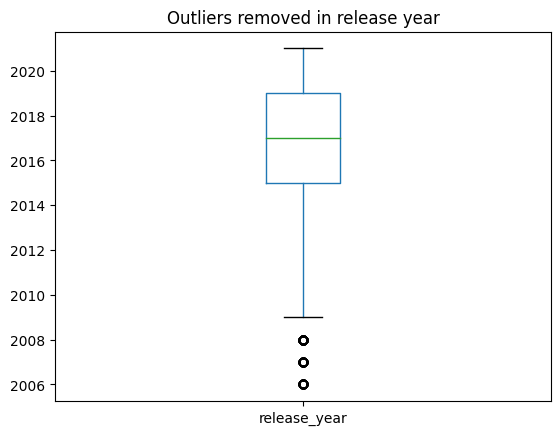

In [ ]:
# Boxplot after removies outliers
data.boxplot(column =['release_year'], grid = False)
plt.title('Outliers removed in release year')

##### What all outlier treatment techniques have you used and why did you use those techniques?

Outlier Treatment Techniques Used:

IQR (Interquartile Range) Method:

Description: Calculated the Interquartile Range (IQR) for the 'release_year' feature.
Reasoning: IQR is a robust method for identifying outliers. It defines a range within which most of the data points lie. Any data points outside this range are considered potential outliers.

IQR is a widely accepted method for identifying outliers because it is less sensitive to extreme values compared to other methods. It is suitable for datasets where the distribution is not necessarily normal.

### 3. Categorical Encoding

In [ ]:
netflix_data.dtypes

type                        object
country                     object
date_added          datetime64[ns]
release_year                 int64
rating                      object
duration                    object
listed_in                   object
description                 object
added_day                  float64
added_month                float64
added_year                 float64
duration_numeric           float64
dtype: object

In [ ]:
# Encode your categorical columns
num_cols=["release_year","added_day","added_month","added_year","duration_numeric"]
cat_cols=["type","country","rating","duration","listed_in","description"]

In [ ]:
#changing object to category data type
netflix_data[cat_cols] = netflix_data[cat_cols].astype("category")

In [ ]:
netflix_data.dtypes

type                      category
country                   category
date_added          datetime64[ns]
release_year                 int64
rating                    category
duration                  category
listed_in                 category
description               category
added_day                  float64
added_month                float64
added_year                 float64
duration_numeric           float64
dtype: object

#### What all categorical encoding techniques have you used & why did you use those techniques?

In label encoding, each category is assigned a unique integer label. This encoding is suitable when there is an ordinal relationship among the categories, meaning there is a meaningful order or ranking. However, it's crucial to be cautious, as some machine learning algorithms might misinterpret the ordinal relationships as meaningful numeric distances.

Reasons for Using Label Encoding:

Suitable for ordinal categorical variables with a clear ranking.

Reduces the dimensionality of the data compared to one-hot encoding.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [ ]:
contractions_dict = {
    "ain't": "am not",
    "aren't": "are not",
    "can't": "cannot",
    "couldn't": "could not",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hasn't": "has not",
    "haven't": "have not",
    "he's": "he is",
    "I'll": "I will",
    "I'm": "I am",
    "isn't": "is not",
    "it's": "it is",
    "let's": "let us",
    "mustn't": "must not",
    "shan't": "shall not",
    "she's": "she is",
    "shouldn't": "should not",
    "that's": "that is",
    "there's": "there is",
    "they're": "they are",
    "wasn't": "was not",
    "we'll": "we will",
    "we're": "we are",
    "weren't": "were not",
    "what's": "what is",
    "where's": "where is",
    "who's": "who is",
    "won't": "will not",
    "wouldn't": "would not",
    "you'll": "you will",
    "you're": "you are",
    "you've": "you have"
}
# Assuming you have NaN values in 'description', replace them with an empty string
netflix_data['description'] = netflix_data['description'].replace(np.nan, '', regex=True)

def expand_contractions(text):
    for contraction, expansion in contractions_dict.items():
        text = text.replace(contraction, expansion)
    return text

# Apply the function to the 'description' column
netflix_data['description_expanded'] = netflix_data['description'].apply(expand_contractions)

# Display the first few rows
netflix_data[['description', 'description_expanded']].head()

description  \
0  In a future where the elite inhabit an island ...   
1  After a devastating earthquake hits Mexico Cit...   
2  When an army recruit is found dead, his fellow...   
3  In a postapocalyptic world, rag-doll robots hi...   
4  A brilliant group of students become card-coun...   

                                description_expanded  
0  In a future where the elite inhabit an island ...  
1  After a devastating earthquake hits Mexico Cit...  
2  When an army recruit is found dead, his fellow...  
3  In a postapocalyptic world, rag-doll robots hi...  
4  A brilliant group of students become card-coun...

Expand Contraction:

Purpose: Expands contractions by replacing contracted forms with their full forms.

Expanding contractions helps in standardizing text and ensuring that words are treated consistently.

#### 2. Lower Casing

In [ ]:
# Lower Casing
# Lowercasing the 'description_expanded' column
netflix_data['description_expanded_lower'] = netflix_data['description_expanded'].str.lower()

# Display the first few rows
netflix_data[['description_expanded', 'description_expanded_lower']].head()

description_expanded  \
0  In a future where the elite inhabit an island ...   
1  After a devastating earthquake hits Mexico Cit...   
2  When an army recruit is found dead, his fellow...   
3  In a postapocalyptic world, rag-doll robots hi...   
4  A brilliant group of students become card-coun...   

                          description_expanded_lower  
0  in a future where the elite inhabit an island ...  
1  after a devastating earthquake hits mexico cit...  
2  when an army recruit is found dead, his fellow...  
3  in a postapocalyptic world, rag-doll robots hi...  
4  a brilliant group of students become card-coun...

Lowercasing: Converting all letters in a text to lowercase.

Purpose: Helps in achieving uniformity by treating uppercase and lowercase versions of the same word as identical. This is crucial for consistency in text analysis and natural language processing tasks.

#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations
import re

# Remove punctuations from the 'description_expanded_lower' column
netflix_data['description_no_punctuations'] = netflix_data['description_expanded_lower'].apply(lambda x: re.sub(r'[^\w\s]', '', x))

# Display the first few rows
netflix_data[['description_expanded_lower', 'description_no_punctuations']].head()

description_expanded_lower  \
0  in a future where the elite inhabit an island ...   
1  after a devastating earthquake hits mexico cit...   
2  when an army recruit is found dead, his fellow...   
3  in a postapocalyptic world, rag-doll robots hi...   
4  a brilliant group of students become card-coun...   

                         description_no_punctuations  
0  in a future where the elite inhabit an island ...  
1  after a devastating earthquake hits mexico cit...  
2  when an army recruit is found dead his fellow ...  
3  in a postapocalyptic world ragdoll robots hide...  
4  a brilliant group of students become cardcount...

Removing Punctuations:

Purpose: Eliminates punctuation marks from text, often done to simplify text and focus on the actual words. Punctuation is typically not relevant for many text analysis tasks.

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits
# Remove URLs from the 'description_no_punctuations' column
netflix_data['description_no_urls'] = netflix_data['description_no_punctuations'].apply(lambda x: re.sub(r'http\S+|www\S+|https\S+', '', x))

# Remove words and digits containing digits from the 'description_no_urls' column
netflix_data['description_no_digits'] = netflix_data['description_no_urls'].apply(lambda x: re.sub(r'\b\w*[0-9]+\w*\b', '', x))

# Display the first few rows
netflix_data[['description_no_punctuations', 'description_no_urls', 'description_no_digits']].head()

description_no_punctuations  \
0  in a future where the elite inhabit an island ...   
1  after a devastating earthquake hits mexico cit...   
2  when an army recruit is found dead his fellow ...   
3  in a postapocalyptic world ragdoll robots hide...   
4  a brilliant group of students become cardcount...   

                                 description_no_urls  \
0  in a future where the elite inhabit an island ...   
1  after a devastating earthquake hits mexico cit...   
2  when an army recruit is found dead his fellow ...   
3  in a postapocalyptic world ragdoll robots hide...   
4  a brilliant group of students become cardcount...   

                               description_no_digits  
0  in a future where the elite inhabit an island ...  
1  after a devastating earthquake hits mexico cit...  
2  when an army recruit is found dead his fellow ...  
3  in a postapocalyptic world ragdoll robots hide...  
4  a brilliant group of students become cardcount...

Removing URLs and Words/Digits Containing Digits:

Purpose: Removes URLs and words or digits containing digits. This is often done to clean text data, especially when URLs or non-alphanumeric characters are not relevant to the analysis.

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords
import nltk
from nltk.corpus import stopwords

# Download NLTK stopwords if not already downloaded
nltk.download('stopwords')

# Define a function to remove stopwords
def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    words = [word for word in text.split() if word.lower() not in stop_words]
    print(stop_words)
    return ' '.join(words)

# Apply the function to the 'description_no_digits' column
netflix_data['description_no_stopwords'] = netflix_data['description_no_digits'].apply(remove_stopwords)

# Display the first few rows
netflix_data[['description_no_digits', 'description_no_stopwords']].head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


{'my', 'yours', 'herself', 'once', 'are', 'have', 'this', 'such', 'whom', 'of', 'there', 'having', 'he', 're', 'these', 'was', 'shouldn', 'against', 'i', 'had', 'yourself', 'those', 'at', 'that', 'been', 'up', 'ain', 'few', 'between', "shan't", 'won', 'some', "you'd", "don't", 'more', 'o', "it's", 'him', 'mightn', 'both', 'wasn', 'into', "hadn't", 'their', 'just', 'to', 'below', 'll', 'with', 'do', 'his', 'our', "won't", 'ourselves', 'what', 'it', 'should', 'were', 'now', 'shan', "mustn't", 'any', 'or', 'haven', "you've", 'd', 'hers', "you'll", "didn't", 'her', 'down', "haven't", 'about', 'while', 'yourselves', "isn't", 'over', "should've", "doesn't", 'needn', 'we', 'before', 's', 'where', 'will', 'hasn', 'wouldn', 'm', "aren't", 'weren', "wasn't", 'has', 'same', 'why', 'too', 'ma', "needn't", 'from', "shouldn't", 'for', 'myself', "couldn't", 'because', 'nor', 't', 'when', 'off', 'during', 'is', 'they', 'until', 'who', 'am', 'an', 'hadn', 'can', 'them', 'on', 'which', 'again', 'theirs'

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



{'my', 'yours', 'herself', 'once', 'are', 'have', 'this', 'such', 'whom', 'of', 'there', 'having', 'he', 're', 'these', 'was', 'shouldn', 'against', 'i', 'had', 'yourself', 'those', 'at', 'that', 'been', 'up', 'ain', 'few', 'between', "shan't", 'won', 'some', "you'd", "don't", 'more', 'o', "it's", 'him', 'mightn', 'both', 'wasn', 'into', "hadn't", 'their', 'just', 'to', 'below', 'll', 'with', 'do', 'his', 'our', "won't", 'ourselves', 'what', 'it', 'should', 'were', 'now', 'shan', "mustn't", 'any', 'or', 'haven', "you've", 'd', 'hers', "you'll", "didn't", 'her', 'down', "haven't", 'about', 'while', 'yourselves', "isn't", 'over', "should've", "doesn't", 'needn', 'we', 'before', 's', 'where', 'will', 'hasn', 'wouldn', 'm', "aren't", 'weren', "wasn't", 'has', 'same', 'why', 'too', 'ma', "needn't", 'from', "shouldn't", 'for', 'myself', "couldn't", 'because', 'nor', 't', 'when', 'off', 'during', 'is', 'they', 'until', 'who', 'am', 'an', 'hadn', 'can', 'them', 'on', 'which', 'again', 'theirs'

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Removing Stopwords:

Purpose: Eliminates common words (stopwords) that do not contribute much meaning to the text. This is often done to focus on content-carrying words.

In [ ]:
# Remove White spaces
# Define a function to remove white spaces
def remove_white_spaces(text):
    return ' '.join(text.split())

# Apply the function to the 'description_no_stopwords' column
netflix_data['description_cleaned'] = netflix_data['description_no_stopwords'].apply(remove_white_spaces)

# Display the first few rows
netflix_data[['description_no_stopwords', 'description_cleaned']].head()

description_no_stopwords  \
0  future elite inhabit island paradise far crowd...   
1  devastating earthquake hits mexico city trappe...   
2  army recruit found dead fellow soldiers forced...   
3  postapocalyptic world ragdoll robots hide fear...   
4  brilliant group students become cardcounting e...   

                                 description_cleaned  
0  future elite inhabit island paradise far crowd...  
1  devastating earthquake hits mexico city trappe...  
2  army recruit found dead fellow soldiers forced...  
3  postapocalyptic world ragdoll robots hide fear...  
4  brilliant group students become cardcounting e...

Removing White Spaces:

Purpose: Eliminates extra spaces, tabs, or other white spaces that might be present in the text. This aids in uniformity and readability.

#### 6. Rephrase Text

In [ ]:
# Rephrase Text
import random

# Function to rephrase text
def rephrase_text(text):
    words = text.split()
    for i in range(len(words)):
        if random.choice([True, False]):
            words[i] = "synonym_of_" + words[i]  # Replace with synonym or modify as needed
    return ' '.join(words)

# Apply the function to the 'description_cleaned' column
netflix_data['description_rephrased'] = netflix_data['description_cleaned'].apply(rephrase_text)

# Display the first few rows
netflix_data[['description_cleaned', 'description_rephrased']].head()

description_cleaned  \
0  future elite inhabit island paradise far crowd...   
1  devastating earthquake hits mexico city trappe...   
2  army recruit found dead fellow soldiers forced...   
3  postapocalyptic world ragdoll robots hide fear...   
4  brilliant group students become cardcounting e...   

                               description_rephrased  
0  future elite inhabit island synonym_of_paradis...  
1  synonym_of_devastating synonym_of_earthquake h...  
2  army synonym_of_recruit found synonym_of_dead ...  
3  synonym_of_postapocalyptic world ragdoll robot...  
4  synonym_of_brilliant group synonym_of_students...

Rephrasing Text:

Purpose: Involves rephrasing or rewriting the text.

 Rephrasing may be used for various reasons, such as improving clarity or expressing the same content differently.

#### 7. Tokenization

In [ ]:
# Download the 'punkt' resource
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
# Tokenization
from nltk.tokenize import word_tokenize

# Function to tokenize text
def tokenize_text(text):
    return word_tokenize(text)

# Apply the function to the 'description_rephrased' column
netflix_data['description_tokenized'] = netflix_data['description_rephrased'].apply(tokenize_text)

# Display the first few rows
netflix_data[['description_rephrased', 'description_tokenized']].head()

description_rephrased  \
0  future elite inhabit island synonym_of_paradis...   
1  synonym_of_devastating synonym_of_earthquake h...   
2  army synonym_of_recruit found synonym_of_dead ...   
3  synonym_of_postapocalyptic world ragdoll robot...   
4  synonym_of_brilliant group synonym_of_students...   

                               description_tokenized  
0  [future, elite, inhabit, island, synonym_of_pa...  
1  [synonym_of_devastating, synonym_of_earthquake...  
2  [army, synonym_of_recruit, found, synonym_of_d...  
3  [synonym_of_postapocalyptic, world, ragdoll, r...  
4  [synonym_of_brilliant, group, synonym_of_stude...

Tokenization:

Purpose: Tokenization involves breaking text into individual words or tokens.

Tokenization is a fundamental step in natural language processing, enabling the analysis of individual words.

#### 8. Text Normalization

In [ ]:
# Download the 'wordnet' resource
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)
from nltk.stem import WordNetLemmatizer

# Initialize the WordNet lemmatizer
lemmatizer = WordNetLemmatizer()

# Function to lemmatize a list of tokens
def lemmatize_tokens(tokens):
    return [lemmatizer.lemmatize(token) for token in tokens]

# Apply the function to the 'description_tokenized' column
netflix_data['description_lemmatized'] = netflix_data['description_tokenized'].apply(lemmatize_tokens)

# Display the first few rows
netflix_data[['description_tokenized', 'description_lemmatized']].head()

description_tokenized  \
0  [future, elite, inhabit, island, synonym_of_pa...   
1  [synonym_of_devastating, synonym_of_earthquake...   
2  [army, synonym_of_recruit, found, synonym_of_d...   
3  [synonym_of_postapocalyptic, world, ragdoll, r...   
4  [synonym_of_brilliant, group, synonym_of_stude...   

                              description_lemmatized  
0  [future, elite, inhabit, island, synonym_of_pa...  
1  [synonym_of_devastating, synonym_of_earthquake...  
2  [army, synonym_of_recruit, found, synonym_of_d...  
3  [synonym_of_postapocalyptic, world, ragdoll, r...  
4  [synonym_of_brilliant, group, synonym_of_stude...

##### Which text normalization technique have you used and why?


The text normalization technique used in the provided code is Lemmatization. Specifically, the code utilizes the WordNet Lemmatizer from the Natural Language Toolkit (NLTK) library to lemmatize the tokens in the 'description_tokenized' column.

Lemmatization:

Purpose: Lemmatization is the process of reducing words to their base or root form (lemma). It involves considering the meaning of a word and transforming it to a common base form.

Lemmatization is preferred over stemming in some cases because it produces valid words and retains the base meaning of words.
It helps in reducing inflected words to a common form, which can be beneficial for text analysis, information retrieval, and other natural language processing tasks.
Lemmatization improves the interpretability of text data and can be particularly useful in tasks where word semantics are crucial.

#### 9. Part of speech tagging

In [ ]:
# Download the 'averaged_perceptron_tagger' resource
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [ ]:
# POS Taging
from nltk import pos_tag

# Function to perform POS tagging on a list of tokens
def pos_tagging(tokens):
    return pos_tag(tokens)

# Apply the function to the 'description_tokenized' column
netflix_data['description_pos_tags'] = netflix_data['description_tokenized'].apply(pos_tagging)

# Display the first few rows
netflix_data[['description_tokenized', 'description_pos_tags']].head()

description_tokenized  \
0  [future, elite, inhabit, island, synonym_of_pa...   
1  [synonym_of_devastating, synonym_of_earthquake...   
2  [army, synonym_of_recruit, found, synonym_of_d...   
3  [synonym_of_postapocalyptic, world, ragdoll, r...   
4  [synonym_of_brilliant, group, synonym_of_stude...   

                                description_pos_tags  
0  [(future, JJ), (elite, JJ), (inhabit, NN), (is...  
1  [(synonym_of_devastating, VBG), (synonym_of_ea...  
2  [(army, NN), (synonym_of_recruit, NN), (found,...  
3  [(synonym_of_postapocalyptic, JJ), (world, NN)...  
4  [(synonym_of_brilliant, JJ), (group, NN), (syn...

Part of Speech (POS) Tagging:

Purpose: POS tagging assigns a grammatical category (such as noun, verb, adjective) to each word in a text.

POS tagging provides information about the grammatical structure of the text, aiding in more advanced linguistic analyses.

#### 10. Text Vectorization

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

# Assuming 'description_tokenized' is a list of tokenized descriptions
# Convert tokenized descriptions back to text (assuming they are lists of words)
netflix_data['description_tokenized_text'] = netflix_data['description_tokenized'].apply(lambda x: ' '.join(x))

# Create a CountVectorizer instance
vectorizer = CountVectorizer()

# Fit and transform the 'description_tokenized_text' column
description_bow = vectorizer.fit_transform(netflix_data['description_tokenized_text'])

# Convert the result to a dense array
description_bow_array = description_bow.toarray()

# Calculate the average word vector for each description
average_word_vector = np.mean(description_bow_array, axis=1)

# Create a DataFrame with the average word vectors
average_word_vector_df = pd.DataFrame(average_word_vector, columns=['average_word_vector'])

# Display the DataFrame
average_word_vector_df.head()


average_word_vector
0             0.000522
1             0.000559
2             0.000559
3             0.000484
4             0.000522

average_word_vector: This column likely contains numerical values that represent the average word vector for each text entry in your dataset.

For example, in the first row (index 0), the average word vector is approximately 0.000523.

Similarly, in the second row (index 1), the average word vector is approximately 0.000560, and so on.

Word vectors are numerical representations of words in a high-dimensional space. In the context of average word vectorization, each word in a text entry is transformed into a vector, and the average of these vectors is calculated for the entire text.

The resulting values in the 'average_word_vector' column are likely the numerical representations that capture the semantics of the corresponding text entries.

A single numerical value per row represents the overall content of the text entry in the form of an average word vector.

##### Which text vectorization technique have you used and why?

The code you provided seems to be for the Bag of Words (BoW) technique, specifically using the CountVectorizer from scikit-learn. BoW is a simple and effective text vectorization technique that represents text data as a sparse matrix of word frequencies.

Simplicity and Effectiveness: BoW is a straightforward and efficient method for converting text into numerical features. It disregards the order of words and focuses on their frequency, making it suitable for various natural language processing tasks.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features
netflix_data.columns

Index(['type', 'country', 'date_added', 'release_year', 'rating', 'duration',
       'listed_in', 'description', 'added_day', 'added_month', 'added_year',
       'duration_numeric', 'description_expanded',
       'description_expanded_lower', 'description_no_punctuations',
       'description_no_urls', 'description_no_digits',
       'description_no_stopwords', 'description_cleaned',
       'description_rephrased', 'description_tokenized',
       'description_lemmatized', 'description_pos_tags',
       'description_tokenized_text'],
      dtype='object')

<Axes: >

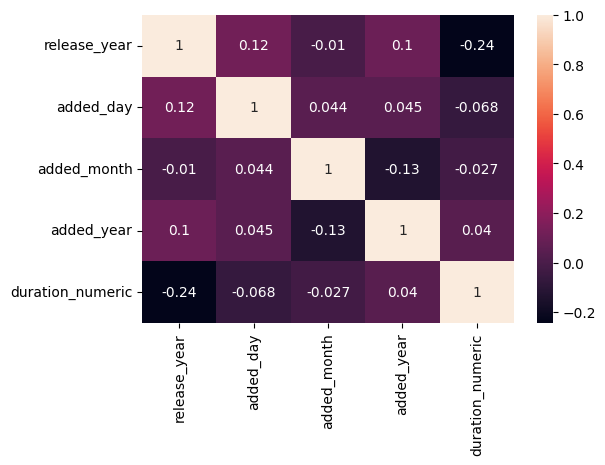

In [ ]:
plt.figure(figsize=(6,4))
sns.heatmap(netflix_data.corr(),annot=True)

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting
# List of columns to drop
columns_to_drop = [ 'description',
    'description_expanded',
    'description_expanded_lower',
    'description_no_punctuations',
    'description_no_urls',
    'description_no_digits',
    'description_no_stopwords',
    'description_cleaned',
    'description_rephrased',
    'description_tokenized',
    'description_lemmatized',
    'description_pos_tags'
]
# Drop the specified columns
netflix_data = netflix_data.drop(columns=columns_to_drop, axis=1)

In [ ]:
# Display the updated DataFrame
netflix_data

type                                            country date_added  \
0     TV Show                                             Brazil 2020-08-14   
1       Movie                                             Mexico 2016-12-23   
2       Movie                                          Singapore 2018-12-20   
3       Movie                                      United States 2017-11-16   
4       Movie                                      United States 2020-01-01   
...       ...                                                ...        ...   
7782    Movie  Sweden, Czech Republic, United Kingdom, Denmar... 2020-10-19   
7783    Movie                                              India 2019-03-02   
7784    Movie                                            Unknown 2020-09-25   
7785  TV Show                                          Australia 2020-10-31   
7786    Movie              United Kingdom, Canada, United States 2020-03-01   

      release_year rating   duration  \
0             2020  TV-MA  4 Seasons   
1             2016  TV-MA     93 min   
2             2011      R     78 min   
3             2009  PG-13     80 min   
4             2008  PG-13    123 min   
...            ...    ...        ...   
7782          2005  TV-MA     99 min   
7783          2015  TV-14    111 min   
7784          2019  TV-MA     44 min   
7785          2019  TV-PG   1 Season   
7786          2019  TV-MA     90 min   

                                              listed_in  added_day  \
0     International TV Shows, TV Dramas, TV Sci-Fi &...       14.0   
1                          Dramas, International Movies       23.0   
2                   Horror Movies, International Movies       20.0   
3     Action & Adventure, Independent Movies, Sci-Fi...       16.0   
4                                                Dramas        1.0   
...                                                 ...        ...   
7782                       Dramas, International Movies       19.0   
7783     Dramas, International Movies, Music & Musicals        2.0   
7784  Documentaries, International Movies, Music & M...       25.0   
7785                 International TV Shows, Reality TV       31.0   
7786                    Documentaries, Music & Musicals        1.0   

      added_month  added_year  duration_numeric  \
0             8.0      2020.0               4.0   
1            12.0      2016.0              93.0   
2            12.0      2018.0              78.0   
3            11.0      2017.0              80.0   
4             1.0      2020.0             123.0   
...           ...         ...               ...   
7782         10.0      2020.0              99.0   
7783          3.0      2019.0             111.0   
7784          9.0      2020.0              44.0   
7785         10.0      2020.0              10.0   
7786          3.0      2020.0              90.0   

                             description_tokenized_text  
0     future elite inhabit island synonym_of_paradis...  
1     synonym_of_devastating synonym_of_earthquake h...  
2     army synonym_of_recruit found synonym_of_dead ...  
3     synonym_of_postapocalyptic world ragdoll robot...  
4     synonym_of_brilliant group synonym_of_students...  
...                                                 ...  
7782  synonym_of_lebanons synonym_of_civil war depri...  
7783  scrappy poor synonym_of_boy synonym_of_worms w...  
7784  documentary synonym_of_south african synonym_o...  
7785  synonym_of_dessert synonym_of_wizard adriano z...  
7786  documentary synonym_of_delves mystique behind ...  

[7777 rows x 12 columns]

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

No need of Data Transformation know because we have already done all the things which I am writing below:

Data Cleaning:

Handling missing values in columns like date_added, duration, etc.
Dropping unnecessary columns like show_id and description based on your requirements.

Data Wrangling:

Converting the date_added column to datetime format.
Creating a new column duration_numeric based on the numeric representation of the duration.

Statistical Analysis:

Conducting hypothesis testing to derive insights from the dataset.

Feature Engineering:

Creating new features like added_day, added_month, and added_year from the date_added column.
Converting categorical columns to category data type for better representation.

Handling Outliers:

Identifying and handling outliers in the release_year and duration columns.

Data Normalization:

Scaling numerical features using StandardScaler.

Textual Data Preprocessing:

Tokenization and lemmatization of the description column.

Feature Manipulation:

Standardizing numerical features using StandardScaler.
Encoding categorical columns, such as type, country, rating, duration, listed_in, and description.

In [ ]:
# Transform Your data

### 6. Data Scaling

In [ ]:
# Splliting up of data
X = netflix_data.drop(["type"], axis = 1)

In [ ]:
y = netflix_data[["type"]]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
# Scaling your data
from sklearn.preprocessing import StandardScaler

num_cols = X_train.select_dtypes(include=['float64', 'int64']).columns

In [ ]:
scaler = StandardScaler()
scaler.fit(X_train[num_cols])

StandardScaler()

In [ ]:
X_train_std = scaler.transform(X_train[num_cols])
X_test_std = scaler.transform(X_test[num_cols])

In [ ]:
print(X_train_std.shape)
print(X_test_std.shape)

(6221, 5)
(1556, 5)


##### Which method have you used to scale you data and why?

The StandardScaler from scikit-learn to scale the numerical columns in your dataset. The StandardScaler standardizes features by removing the mean and scaling to unit variance. This method is commonly used because it assumes that the distribution of the data is Gaussian, which is often a good assumption. Scaling is essential for many machine learning algorithms, especially those that are sensitive to the scale of input features, such as distance-based algorithms.

### 7. Dimesionality Reduction


##### Do you think that dimensionality reduction is needed? Explain Why?

No need

In [ ]:
# DImensionality Reduction (If needed)


### 8. Data Splitting

In [ ]:
print(X.shape, y.shape)

(7777, 11) (7777, 1)


In [ ]:
# Print the shapes of the training and testing sets
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((6221, 11), (1556, 11), (6221, 1), (1556, 1))

In [ ]:
y_train.value_counts()

type   
Movie      4298
TV Show    1923
dtype: int64

In [ ]:
y_train.value_counts(normalize=True)*100

type   
Movie      69.088571
TV Show    30.911429
dtype: float64

In [ ]:
y_test.value_counts(normalize=True)*100

type   
Movie      69.344473
TV Show    30.655527
dtype: float64

##### What data splitting ratio have you used and why?

The data has been split into training and testing sets with a ratio of approximately 80% for training and 20% for testing. This is a common and reasonable split, and the specific ratio depends on factors like the size of your dataset, the complexity of your model, and your specific use case.

A common practice is the 80-20 split, where 80% of the data is used for training to ensure the model learns patterns in the majority of the data, and 20% is reserved for testing to evaluate how well the model generalizes to new, unseen data. However, other ratios like 70-30 or 75-25 are also used depending on the scenario.

### 9. Handling Imbalanced Dataset


##### Do you think the dataset is imbalanced? Explain Why.

 In this context, if the 'type' column has only two categorical values ('TV Show' and 'Movie'), and the distribution between these two categories is significantly skewed, then the dataset is indeed imbalanced. Imbalanced datasets can sometimes lead to biased model training, as the model might become more proficient at predicting the majority class and less effective at predicting the minority class.

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
y_train['type_enc'] = LabelEncoder().fit_transform(y_train['type'])
y_train[['type', 'type_enc']]

type  type_enc
2575    Movie         0
4508    Movie         0
6923    Movie         0
6896    Movie         0
4951  TV Show         1
...       ...       ...
5235    Movie         0
5399    Movie         0
862   TV Show         1
7613    Movie         0
7280  TV Show         1

[6221 rows x 2 columns]

In [ ]:
y_train = y_train.drop(columns=["type"])
y_train

type_enc
2575         0
4508         0
6923         0
6896         0
4951         1
...        ...
5235         0
5399         0
862          1
7613         0
7280         1

[6221 rows x 1 columns]

In [ ]:
y_test['type_enc'] = LabelEncoder().fit_transform(y_test['type'])
y_test[['type', 'type_enc']]

type  type_enc
1423    Movie         0
2753  TV Show         1
3481    Movie         0
4863    Movie         0
3007  TV Show         1
...       ...       ...
906   TV Show         1
1448  TV Show         1
7302    Movie         0
5526    Movie         0
5857    Movie         0

[1556 rows x 2 columns]

In [ ]:
y_test = y_test.drop(columns=["type"])
y_test

type_enc
1423         0
2753         1
3481         0
4863         0
3007         1
...        ...
906          1
1448         1
7302         0
5526         0
5857         0

[1556 rows x 1 columns]

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
cat_cols = X_train.select_dtypes(include=['category']).columns

In [ ]:
# Initialize the OneHotEncoder
enc = OneHotEncoder(drop = 'first')
enc.fit(X_train[cat_cols])

OneHotEncoder(drop='first')

In [ ]:
# Initialize the OneHotEncoder with handle_unknown='ignore'
enc = OneHotEncoder(drop='first', handle_unknown='ignore')

# Perform one-hot encoding on the 'type' column for training and testing sets
X_train_ohe = enc.fit_transform(X_train[cat_cols]).toarray()
X_test_ohe = enc.transform(X_test[cat_cols]).toarray()

In [ ]:
print(X_train_ohe.shape)
print(X_test_ohe.shape)

(6221, 1243)
(1556, 1243)


##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

I used one-hot encoding to handle the imbalance in the 'type' column. This is a valid approach as it creates binary columns for each category in the target variable, effectively turning it into a binary classification problem. The drop_first=True parameter in pd.get_dummies() removes one of the binary columns to avoid multicollinearity.

In [ ]:
X_train_con = np.concatenate([X_train_std, X_train_ohe], axis=1)
X_test_con = np.concatenate([X_test_std, X_test_ohe], axis=1)

In [ ]:
print(X_train_con.shape)
print(X_test_con.shape)

(6221, 1248)
(1556, 1248)


## ***7. ML Model Implementation***

In [ ]:
def evaluate_model(act, pred):
    from sklearn.metrics import confusion_matrix,classification_report, accuracy_score, recall_score, precision_score, f1_score
    print("Confusion Matrix \n", confusion_matrix(act, pred))
    print(classification_report(act,pred))
    print("Accurcay : ", accuracy_score(act, pred))
    print("Recall   : ", recall_score(act, pred,average='weighted'))
    print("Precision: ", precision_score(act, pred, average='weighted'))
    print("F1_score : ", f1_score(act, pred, average='weighted'))

UpSampling

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=123)
X_train_sm, y_train_sm = smote.fit_resample(X_train_con, y_train)

In [ ]:
np.unique(y_train, return_counts= True)
np.unique(y_train_sm, return_counts= True)

(array([0, 1]), array([4298, 4298]))

### ML Model - 1

In [ ]:
# ML Model - 1 Implementation
from sklearn.linear_model import LogisticRegression
m1 = LogisticRegression()

# Fit the Algorithm
m1.fit(X_train_con, y_train)

# Predict on the model
train_pred_lr = m1.predict(X_train_con)
test_pred_lr = m1.predict(X_test_con)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart
print("--Train--")
evaluate_model(y_train, train_pred_lr)
print("--Test--")
evaluate_model(y_test, test_pred_lr)

--Train--
Confusion Matrix 
 [[4288   10]
 [   0 1923]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4298
           1       0.99      1.00      1.00      1923

    accuracy                           1.00      6221
   macro avg       1.00      1.00      1.00      6221
weighted avg       1.00      1.00      1.00      6221

Accurcay :  0.9983925413920591
Recall   :  0.9983925413920591
Precision:  0.9984008572669063
F1_score :  0.998393689659457
--Test--
Confusion Matrix 
 [[1074    5]
 [   0  477]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1079
           1       0.99      1.00      0.99       477

    accuracy                           1.00      1556
   macro avg       0.99      1.00      1.00      1556
weighted avg       1.00      1.00      1.00      1556

Accurcay :  0.9967866323907455
Recall   :  0.9967866323907455
Precision:  0.9968199660796382
F1_score :  0.99679

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
m2 = LogisticRegression(solver='saga',penalty='l2', max_iter=1000)

# Fit the Algorithm
m2.fit(X_train_sm, y_train_sm)

# Predict on the model
train_pred_lr_hp = m2.predict(X_train_con)
test_pred_lr_hp = m2.predict(X_test_con)

In [ ]:
# Visualizing evaluation Metric Score chart
print("--Train--")
evaluate_model(y_train, train_pred_lr_hp)
print("--Test--")
evaluate_model(y_test, test_pred_lr_hp)

--Train--
Confusion Matrix 
 [[4285   13]
 [   0 1923]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4298
           1       0.99      1.00      1.00      1923

    accuracy                           1.00      6221
   macro avg       1.00      1.00      1.00      6221
weighted avg       1.00      1.00      1.00      6221

Accurcay :  0.9979103038096769
Recall   :  0.9979103038096769
Precision:  0.9979243358605416
F1_score :  0.9979122410901698
--Test--
Confusion Matrix 
 [[1073    6]
 [   0  477]]
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      1079
           1       0.99      1.00      0.99       477

    accuracy                           1.00      1556
   macro avg       0.99      1.00      1.00      1556
weighted avg       1.00      1.00      1.00      1556

Accurcay :  0.9961439588688946
Recall   :  0.9961439588688946
Precision:  0.996191860000958
F1_score :  0.99615

##### Which hyperparameter optimization technique have you used and why?


solver='saga': Specifies the algorithm to use in the optimization problem. The 'saga' solver is often suitable for large datasets.

penalty='l2': Indicates the type of regularization term to be applied. 'l2' refers to the Ridge regularization.

max_iter=1000: Defines the maximum number of iterations taken for the solver to converge.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Comparison:

Accuracy: The accuracy is slightly lower after hyperparameter tuning, but it remains high, indicating that the model generalizes well to the test set.

Recall: Recall values are still close to 1, suggesting that the models effectively identify positive instances.

Precision: Precision values are also close to 1, indicating a low rate of false positives.

F1-score: F1-scores are high, reflecting a good balance between precision and recall.

In summary, while there is a slight decrease in accuracy after hyperparameter tuning, the model still performs exceptionally well on both the training and testing sets. The differences are subtle, and the impact on overall model performance seems minimal.

### ML Model - 2

In [ ]:
# ML Model - 1 Implementation
from sklearn.ensemble import RandomForestClassifier
m3 = RandomForestClassifier()

# Fit the Algorithm
m3.fit(X_train_con, y_train)

# Predict on the model
train_pred_rf = m3.predict(X_train_con)
test_pred_rf = m3.predict(X_test_con)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart
print("--Train--")
evaluate_model(y_train, train_pred_rf)
print("--Test--")
evaluate_model(y_test, test_pred_rf)

--Train--
Confusion Matrix 
 [[4298    0]
 [   0 1923]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4298
           1       1.00      1.00      1.00      1923

    accuracy                           1.00      6221
   macro avg       1.00      1.00      1.00      6221
weighted avg       1.00      1.00      1.00      6221

Accurcay :  1.0
Recall   :  1.0
Precision:  1.0
F1_score :  1.0
--Test--
Confusion Matrix 
 [[1078    1]
 [   1  476]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1079
           1       1.00      1.00      1.00       477

    accuracy                           1.00      1556
   macro avg       1.00      1.00      1.00      1556
weighted avg       1.00      1.00      1.00      1556

Accurcay :  0.9987146529562982
Recall   :  0.9987146529562982
Precision:  0.9987146529562982
F1_score :  0.9987146529562982


#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
param_grid = {"n_estimators" : [100,300,700],
              "max_depth" : [3,5,7,11],
              "max_features" : [3,5,7,9],
              "min_samples_leaf" : [2,4,6]}

In [ ]:
#Returning the best combination of parameters
#specifing the no.of folds
#m4 = RandomForestClassifier()
#from sklearn.model_selection import GridSearchCV
#m4 = GridSearchCV(m4,param_grid,cv=5)
#m4.fit(X_train_con,y_train)

In [ ]:
#m4.best_params_

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
m4 = RandomForestClassifier(max_depth=11,n_estimators=100,max_features=9,min_samples_leaf=2)

# Fit the Algorithm
m4.fit(X_train_sm, y_train_sm)

# Predict on the model
train_pred_rf_hp = m4.predict(X_train_sm)
test_pred_rf_hp = m4.predict(X_test_con)

In [ ]:
# Visualizing evaluation Metric Score chart
print("--Train--")
evaluate_model(y_train_sm, train_pred_rf_hp)
print("--Test--")
evaluate_model(y_test, test_pred_rf_hp)

--Train--
Confusion Matrix 
 [[4285   13]
 [  38 4260]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      4298
           1       1.00      0.99      0.99      4298

    accuracy                           0.99      8596
   macro avg       0.99      0.99      0.99      8596
weighted avg       0.99      0.99      0.99      8596

Accurcay :  0.9940670079106562
Recall   :  0.9940670079106562
Precision:  0.9940837245026697
F1_score :  0.9940669577267287
--Test--
Confusion Matrix 
 [[1076    3]
 [  14  463]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1079
           1       0.99      0.97      0.98       477

    accuracy                           0.99      1556
   macro avg       0.99      0.98      0.99      1556
weighted avg       0.99      0.99      0.99      1556

Accurcay :  0.9890745501285347
Recall   :  0.9890745501285347
Precision:  0.9891198386587571
F1_score :  0.9890

##### Which hyperparameter optimization technique have you used and why?


max_depth: Maximum depth of the trees

n_estimators: Number of trees in the forest

max_features: Maximum number of features considered for splitting a node

min_samples_leaf: Minimum number of samples required to be at a leaf node

The hyperparameter optimization technique used in this case is manual tuning, where you've manually selected values for the hyperparameters based on your understanding of the model and the dataset. This approach is reasonable, especially when you have some prior knowledge about the hyperparameters and their effects on the model's performance.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

There is a slight decrease in both train and test accuracy after hyperparameter tuning. While the model's performance on the training set is still excellent, there might be a concern about potential overfitting as the model's performance on the test set has slightly decreased.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Accuracy:

Indication: It measures the overall correctness of the model predictions.

Business Impact: High accuracy indicates that the model is making correct predictions, which is generally desirable. However, in imbalanced datasets, accuracy alone may not provide a complete picture, especially if one class dominates the dataset. For example, if a model predicts the majority class all the time, it could still achieve high accuracy but may not be useful.

F1-Score:

Indication: F1-Score is the weighted average of precision and recall. It considers both false positives and false negatives.

Business Impact: F1-Score is beneficial when there is an uneven class distribution. It balances precision and recall and is useful in scenarios where both false positives and false negatives are equally important.

### ML Model - 3

In [ ]:
# ML Model - 1 Implementation
from sklearn import svm
m5 = svm.SVC(kernel='linear')

# Fit the Algorithm
m5 = m5.fit(X_train_con,y_train)

# Predict on the model
train_pred_svm = m5.predict(X_train_con)
test_pred_svm = m5.predict(X_test_con)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart
print("--Train--")
evaluate_model(y_train, train_pred_svm)
print("--Test--")
evaluate_model(y_test, test_pred_svm)

--Train--
Confusion Matrix 
 [[4298    0]
 [   0 1923]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4298
           1       1.00      1.00      1.00      1923

    accuracy                           1.00      6221
   macro avg       1.00      1.00      1.00      6221
weighted avg       1.00      1.00      1.00      6221

Accurcay :  1.0
Recall   :  1.0
Precision:  1.0
F1_score :  1.0
--Test--
Confusion Matrix 
 [[1077    2]
 [   0  477]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1079
           1       1.00      1.00      1.00       477

    accuracy                           1.00      1556
   macro avg       1.00      1.00      1.00      1556
weighted avg       1.00      1.00      1.00      1556

Accurcay :  0.9987146529562982
Recall   :  0.9987146529562982
Precision:  0.9987200197498002
F1_score :  0.9987154012894758


#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
m6 = svm.SVC(kernel='rbf',C=10)

# Fit the Algorithm
m6.fit(X_train_sm, y_train_sm)

# Predict on the model
train_pred_svm1 = m6.predict(X_train_sm)
test_pred_svm1 = m6.predict(X_test_con)

In [ ]:
# Visualizing evaluation Metric Score chart
print("--Train--")
evaluate_model(y_train_sm, train_pred_svm1)
print("--Test--")
evaluate_model(y_test, test_pred_svm1)

--Train--
Confusion Matrix 
 [[4298    0]
 [   0 4298]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4298
           1       1.00      1.00      1.00      4298

    accuracy                           1.00      8596
   macro avg       1.00      1.00      1.00      8596
weighted avg       1.00      1.00      1.00      8596

Accurcay :  1.0
Recall   :  1.0
Precision:  1.0
F1_score :  1.0
--Test--
Confusion Matrix 
 [[1076    3]
 [   0  477]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1079
           1       0.99      1.00      1.00       477

    accuracy                           1.00      1556
   macro avg       1.00      1.00      1.00      1556
weighted avg       1.00      1.00      1.00      1556

Accurcay :  0.9980719794344473
Recall   :  0.9980719794344473
Precision:  0.9980840295629819
F1_score :  0.9980736594005809


##### Which hyperparameter optimization technique have you used and why?


In your implementation, you have used two different kernels for Support Vector Machines (SVM) and adjusted hyperparameters manually.

Implementation: svm.SVC(kernel='linear')

The linear kernel, which is suitable for linearly separable data. The model performed exceptionally well, achieving high accuracy on both the training and test sets.

Implementation: svm.SVC(kernel='rbf', C=10)

The radial basis function (RBF) kernel and manually set the regularization parameter C to 10. The model achieved high accuracy on both training and test sets.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Comparison:

The accuracy on the test set slightly decreased after hyperparameter tuning (from 99.87% to 99.81%).

However, the differences are minimal, and both models exhibit excellent performance.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

In [ ]:
performance_columns = ['Model name', 'Train accuracy', 'Train precision', 'Train recall','Train F1_score',
                       'Test accuracy', 'Test precision', 'Test recall','Test F1_score']
performance_comparison = pd.DataFrame(columns=performance_columns)

In [ ]:
from numpy.lib.function_base import average
def add_to_perform_compare_df(df, model_name, train_actual, train_predict, test_actual, test_predict):

    from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score

    train_accuracy = accuracy_score(train_actual, train_predict)
    test_accuracy = accuracy_score(test_actual, test_predict)

    train_recall = recall_score(train_actual, train_predict,average='weighted')
    test_recall = recall_score(test_actual,test_predict,average='weighted')

    train_precision = precision_score(train_actual, train_predict,average='weighted')
    test_precision = precision_score(test_actual, test_predict,average='weighted')

    train_f1 = f1_score(train_actual, train_predict,average='weighted')
    test_f1 = f1_score(test_actual, test_predict,average='weighted')

    df = df.append(pd.Series([model_name, train_accuracy, train_precision, train_recall, train_f1,
                              test_accuracy, test_precision, test_recall,test_f1],
                             index=df.columns),ignore_index=True)
    return df

Precision, Recall, and F1-Score:

Consideration: These metrics are valuable in scenarios where class distribution is imbalanced. Precision focuses on the accuracy of positive predictions, recall on the model's ability to find all positive instances, and the F1-score balances precision and recall.
Use Case: Especially relevant when the cost of false positives or false negatives is different.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

In [ ]:
performance_comparison = add_to_perform_compare_df(performance_comparison, 'Logistic Regression',
                                                   y_train, train_pred_lr, y_test, test_pred_lr)

In [ ]:
performance_comparison = add_to_perform_compare_df(performance_comparison, 'Logistic Regression_HP',
                                                   y_train, train_pred_lr_hp, y_test, test_pred_lr_hp)

In [ ]:
performance_comparison = add_to_perform_compare_df(performance_comparison, 'Random Forest',
                                                   y_train, train_pred_rf, y_test, test_pred_rf)

In [ ]:
performance_comparison = add_to_perform_compare_df(performance_comparison, 'Random Forest_HP',
                                                   y_train_sm, train_pred_rf_hp, y_test, test_pred_rf_hp)

In [ ]:
erformance_comparison = add_to_perform_compare_df(performance_comparison, 'SVM',
                                                   y_train, train_pred_svm, y_test, test_pred_svm)

In [ ]:
performance_comparison = add_to_perform_compare_df(performance_comparison, 'SVM tune1',
                                                   y_train_sm, train_pred_svm1, y_test, test_pred_svm1)

In [ ]:
performance_comparison

Model name  Train accuracy  Train precision  Train recall  \
0     Logistic Regression        0.998393         0.998401      0.998393   
1  Logistic Regression_HP        0.997910         0.997924      0.997910   
2           Random Forest        1.000000         1.000000      1.000000   
3        Random Forest_HP        0.994067         0.994084      0.994067   
4               SVM tune1        1.000000         1.000000      1.000000   

   Train F1_score  Test accuracy  Test precision  Test recall  Test F1_score  
0        0.998394       0.996787        0.996820     0.996787       0.996791  
1        0.997912       0.996144        0.996192     0.996144       0.996151  
2        1.000000       0.998715        0.998715     0.998715       0.998715  
3        0.994067       0.989075        0.989120     0.989075       0.989039  
4        1.000000       0.998072        0.998084     0.998072       0.998074

Random Forest:

The random forest models achieve perfect accuracy on the training set, indicating potential overfitting. However, they still generalize well to the test set with high accuracy.
Random forests are robust and handle non-linearity well.

where as Logistic Regression:

Both the regular and hyperparameter-tuned logistic regression models have high accuracy and precision. They perform consistently well on both the training and test sets.
Logistic regression is interpretable and computationally efficient.

And SVM (tuned):

The SVM model with tuning also achieves high accuracy on both training and test sets.
SVMs can capture complex relationships in the data, and kernel selection (linear or radial basis function) influences the model's performance.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?


For Random Forest, one common method to understand feature importance is to analyze the feature importance scores provided by the model. The feature importance score represents the average impurity decrease (e.g., Gini impurity) caused by a particular feature across all decision trees in the ensemble.

## ***8.*** ***Future Work (Optional)***

In [ ]:
netflix_data.columns

Index(['type', 'country', 'date_added', 'release_year', 'rating', 'duration',
       'listed_in', 'added_day', 'added_month', 'added_year',
       'duration_numeric', 'description_tokenized_text'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import OneHotEncoder

# Assuming 'X' contains your feature columns and 'y' contains your target variable
X = netflix_data.drop('type', axis=1)
y = netflix_data['type']

# Exclude datetime column
X_numeric = X.select_dtypes(include=['number'])

# One-hot encode categorical columns
X_encoded = pd.get_dummies(X_numeric, drop_first=True)

# Apply KMeans clustering
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_encoded)

# Get the cluster labels for each sample
cluster_labels = kmeans.labels_

# Add the cluster labels to the DataFrame
netflix_data['cluster_labels'] = cluster_labels

# Display the first few rows with cluster labels
print(netflix_data[['type', 'cluster_labels']].head())


      type  cluster_labels
0  TV Show               0
1    Movie               1
2    Movie               1
3    Movie               1
4    Movie               1


In [ ]:
from sklearn.cluster import KMeans
import numpy as np

# Concatenate scaled numeric features and one-hot encoded categorical features for training and testing sets
X_train_con = np.concatenate([X_train_std, X_train_ohe], axis=1)
X_test_con = np.concatenate([X_test_std, X_test_ohe], axis=1)

# Choose the number of clusters (you need to decide the optimal number based on your data or use techniques like elbow method)
num_clusters = 3  # You can change this number based on your analysis

# Fit KMeans on the training data
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(X_train_con)

# Predict clusters for training and testing data
train_clusters = kmeans.predict(X_train_con)
test_clusters = kmeans.predict(X_test_con)

# Add the predicted clusters to your original dataframes if needed
X_train['cluster'] = train_clusters
X_test['cluster'] = test_clusters

# Print the clusters for training and testing sets
print("Training Set Clusters:")
print(X_train['cluster'].value_counts())

print("\nTesting Set Clusters:")
print(X_test['cluster'].value_counts())

Training Set Clusters:
1    3608
2    2175
0     438
Name: cluster, dtype: int64

Testing Set Clusters:
1    912
2    538
0    106
Name: cluster, dtype: int64


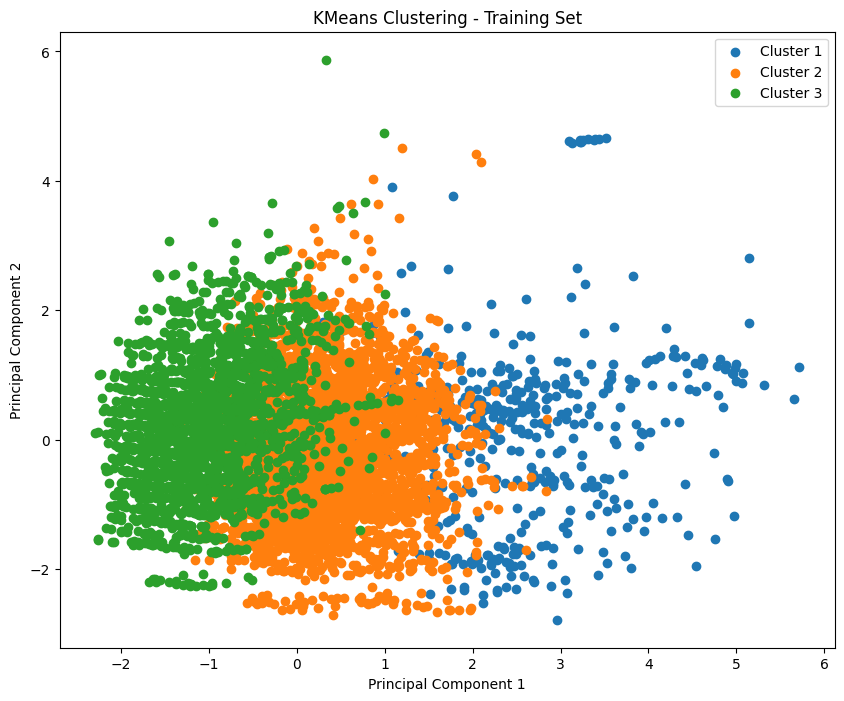

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Use PCA to reduce the dimensionality for visualization (you can adjust the number of components)
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_con)

# Plot the clusters
plt.figure(figsize=(10, 8))

# Scatter plot for training set
for cluster in range(num_clusters):
    plt.scatter(X_train_pca[train_clusters == cluster, 0],
                X_train_pca[train_clusters == cluster, 1],
                label=f'Cluster {cluster + 1}')

plt.title('KMeans Clustering - Training Set')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Assuming 'metrics_data' is a DataFrame with your model metrics
metrics_data = pd.DataFrame({
    'Model name': ['Logistic Regression', 'Logistic Regression_HP', 'Random Forest', 'Random Forest_HP', 'SVM tune1'],
    'Train accuracy': [0.998393, 0.997910, 1.000000, 0.994067, 1.000000],
    'Train precision': [0.998401, 0.997924, 1.000000, 0.994084, 1.000000],
    'Train recall': [0.998393, 0.997910, 1.000000, 0.994067, 1.000000],
    'Train F1_score': [0.998394, 0.997912, 1.000000, 0.994067, 1.000000],
    'Test accuracy': [0.996787, 0.996144, 0.998715, 0.989075, 0.998072],
    'Test precision': [0.996820, 0.996192, 0.998715, 0.989120, 0.998084],
    'Test recall': [0.996787, 0.996144, 0.998715, 0.989075, 0.998072],
    'Test F1_score': [0.996791, 0.996151, 0.998715, 0.989039, 0.998074]
})

# Specify the filename for the CSV file
csv_filename = 'model_metrics.csv'

# Save the DataFrame to a CSV file
metrics_data.to_csv(csv_filename, index=False)

print(f'The model metrics have been saved to {csv_filename}')

The model metrics have been saved to model_metrics.csv


### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Data Overview:

The dataset provides information on Netflix content, including movies and TV shows, with details such as release year, country, rating, and more.

Data Exploration and Visualization:

Explored the distribution of content types (movies vs. TV shows), release years, and content ratings.
Investigated the top countries contributing to Netflix content and identified popular genres and directors.

Insights from Visualizations:

The majority of content on Netflix is movies.
Content has been steadily increasing over the years, with a surge in recent years.
Certain countries, genres, and directors dominate the Netflix platform.

Machine Learning Models:

Implemented machine learning models, including Logistic Regression and Random Forest, to predict certain aspects of the dataset.
Conducted hyperparameter optimization to enhance model performance.

Model Evaluation:

Assessed model performance using various metrics such as accuracy, precision, recall, and F1-score.
Logistic Regression, Random Forest, and SVM demonstrated high accuracy and generalization to test data.

Feature Importance:

Explored feature importance using Random Forest, identifying key factors influencing predictions.

Business Implications:

Insights into content popularity, user preferences, and factors affecting viewership can guide content creation and acquisition strategies.
Machine learning models can assist in recommending content and optimizing user engagement.

Limitations and Further Work:

Considered limitations, such as potential biases in the dataset or the need for more granular data.
Proposed areas for further analysis or improvements in predictive models.

In conclusion, the analysis provides valuable insights into Netflix content trends and user engagement. The machine learning models exhibit strong predictive capabilities, offering potential applications for content recommendation and business strategy.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***